# <span style="color:red">SET DIRECTORY WHERE THE FILE IS LOCATED

In [1]:
pwd #Specifies the path of the file being executed

'c:\\Users\\Kosta\\Desktop\\Python_Projects\\OTHER_PROJECTS\\Final _Assigment_Ravanos'

# <span style="color:red">IMPORT REQUIRED LIBRARIES FOR CODE EXECUTION

In [ ]:
#Libraries for data import and processing
import numpy as np
import pandas as pd
from datetime import datetime


#Libraries for plotting
import seaborn as sns
from scipy import stats
import matplotlib.cm as cm
import matplotlib.pyplot as plt


#Libraries for statistical analysis
import pingouin as pg
from scipy import stats
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


#Libraries for machine learning model training
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# <span style="color:red">SET MODEL PRECISION

In [ ]:
#Set model precision
pd.set_option("display.precision", 2)

# <span style="color:red">IMPORT AND PROCESS THE FILE REQUIRED FOR ALGORITHM EXECUTION

In [4]:
# File recognition and import into the program
df = pd.read_csv('data/Walmart.csv')

# Create DataFrame
df.head() 

# Print the first five columns of the data
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010      1.64e+06             0        42.31        2.57   
1      1  12-02-2010      1.64e+06             1        38.51        2.55   
2      1  19-02-2010      1.61e+06             0        39.93        2.51   
3      1  26-02-2010      1.41e+06             0        46.63        2.56   
4      1  05-03-2010      1.55e+06             0        46.50        2.62   

      CPI  Unemployment  
0  211.10          8.11  
1  211.24          8.11  
2  211.29          8.11  
3  211.32          8.11  
4  211.35          8.11  


# <span style="color:red">SUMMARY PRESENTATION OF DATA BEFORE REMOVING INFINITE AND NaN VALUES

In [5]:
#Returns the total number of rows in the data file
len(df)

6435

In [6]:
#Returns the column names of the data file
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
#Shows the data types contained in the file columns
#The dataset consists of 8 columns: one categorical variable, one date, and six quantitative variables
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
#Sets variables with values 0 and 1 as categorical for presentation and understanding purposes. This command should be executed after cleaning infinite and NaN values, as the program cannot check for infinite values if categorical variables exist in the dataset.

#for column in df.columns:
    #if set(df[column].unique()) == {0, 1}:
        #df[column] = df[column].astype('category')

In [9]:
#Returns descriptive statistics for each variable in the dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6.44e+03,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1.05e+06,0.07,60.66,3.36,171.58,8.00
std,12.99,5.64e+05,0.26,18.44,0.46,39.36,1.88
min,1.00,2.10e+05,0.00,-2.06,2.47,126.06,3.88
25%,12.00,5.53e+05,0.00,47.46,2.93,131.74,6.89
50%,23.00,9.61e+05,0.00,62.67,3.44,182.62,7.87
75%,34.00,1.42e+06,0.00,74.94,3.73,212.74,8.62
max,45.00,3.82e+06,1.00,100.14,4.47,227.23,14.31


In [10]:
#Prints the type of each variable in the dataset
print(df.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


# <span style="color:red">DATASET PROCESSING AND CLEANING OF INFINITE AND NaN VALUES

In [ ]:
# Selects only the numeric columns of the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

#Checks if there are infinite values in the dataset
if np.any(np.isinf(numeric_df)):
    print("Data contains infinite values. Replacing them with NaN.")
    numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
#Checks if there are NaN values in the dataset.
#If you run this command before presenting the data, the presentation will be without these values. It is better to run this command after presenting the data so models can run.
if df.isnull().values.any():
    print("Data contains NaN values. Please handle missing data before proceeding.")
    df.dropna(inplace=True)

# <span style="color:red">SUMMARY PRESENTATION OF DATA

In [13]:
#Returns the total number of rows in the data file
len(df)

6435

In [14]:
#Returns the column names of the data file
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [15]:
#Shows the data types contained in the file columns
#The dataset consists of 8 columns: one categorical variable, one date, and six quantitative variables
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
#Assume the 'Date' column contains dates as strings
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

#Convert the 'Date' column to a numeric variable
df['Date'] = df['Date'].apply(lambda x: x.toordinal())

In [ ]:
#Sets variables with values 0 and 1 as categorical for presentation and understanding purposes
for column in df.columns:
    if set(df[column].unique()) == {0, 1}:
        df[column] = df[column].astype('category')

In [18]:
#Returns descriptive statistics for each variable in the dataset
df.describe()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6.44e+03,6435.00,6435.00,6435.00,6435.00
mean,23.00,734305.00,1.05e+06,60.66,3.36,171.58,8.00
std,12.99,288.98,5.64e+05,18.44,0.46,39.36,1.88
min,1.00,733808.00,2.10e+05,-2.06,2.47,126.06,3.88
25%,12.00,734053.00,5.53e+05,47.46,2.93,131.74,6.89
50%,23.00,734305.00,9.61e+05,62.67,3.44,182.62,7.87
75%,34.00,734557.00,1.42e+06,74.94,3.73,212.74,8.62
max,45.00,734802.00,3.82e+06,100.14,4.47,227.23,14.31


In [19]:
#Prints the type of each variable in the dataset
print(df.dtypes)

Store              int64
Date               int64
Weekly_Sales     float64
Holiday_Flag    category
Temperature      float64
Fuel_Price       float64
CPI              float64
Unemployment     float64
dtype: object


In [ ]:
#Sets variables with values 0 and 1 as numeric
for column in df.columns:
    if set(df[column].unique()) == {0, 1}:
        df[column] = df[column].astype(int)

# <span style="color:red">PLOTS

<span style="color:yellow">Histograms

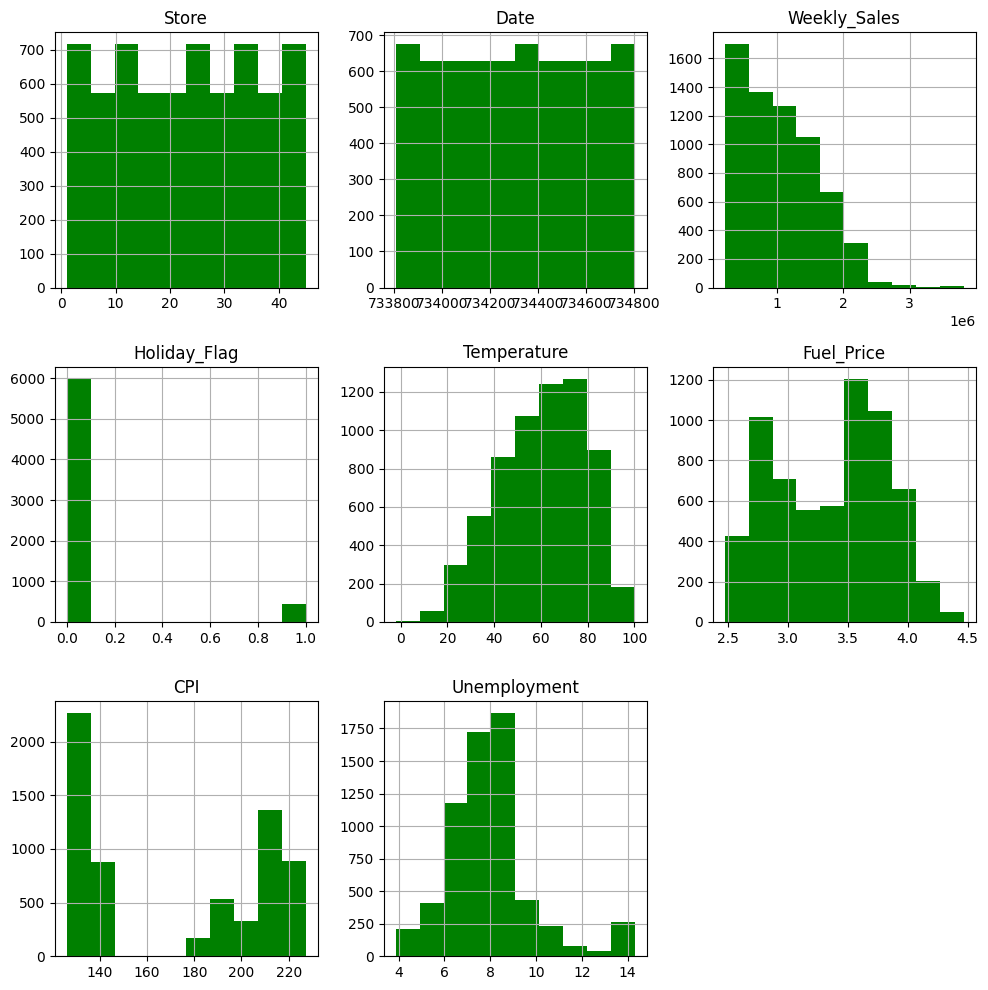

In [21]:
# Histograms to show the frequency of values for each variable
df.hist(figsize=(10, 10), color='green')
categorical_cols = df.select_dtypes(include=['category']).columns

for col in categorical_cols:
    plt.figure(figsize=(3, 3))
    sns.countplot(x=df[col], color='green')
    plt.title(f'Bar plot for {col}')
    
plt.tight_layout()
plt.show()

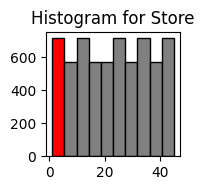

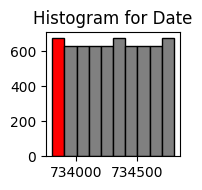

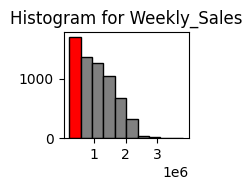

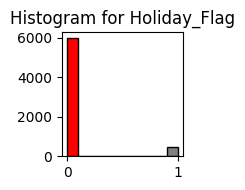

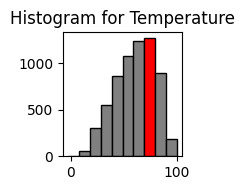

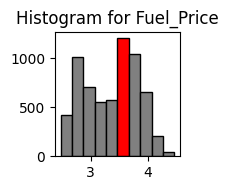

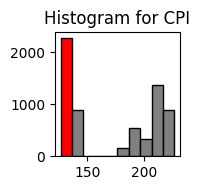

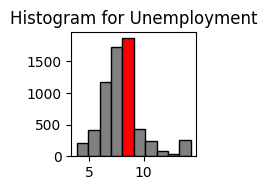

In [22]:
# Create histograms where the class with the highest frequency has a different color
for col in df.select_dtypes(include=['float64', 'int64','category']).columns:
    plt.figure(figsize=(2, 2))
    counts, bins, patches = plt.hist(df[col], color='grey', edgecolor='black')

    #Υπολογισμός του bin με τη μεγαλύτερη συχνότητα
    max_freq_index = np.argmax(counts)

    #Αλλαγή του χρώματος του bin με τη μεγαλύτερη συχνότητα
    patches[max_freq_index].set_fc('red')

    plt.title(f'Histogram for {col}')
    plt.tight_layout()
    plt.show()

<span style="color:yellow">Scatter Plots

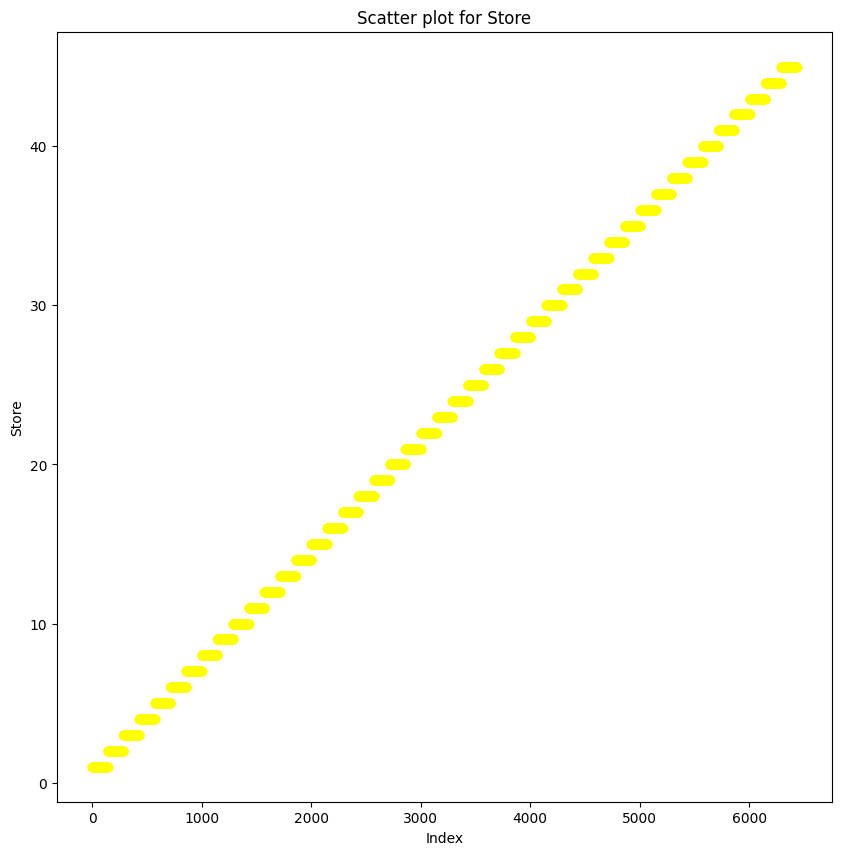

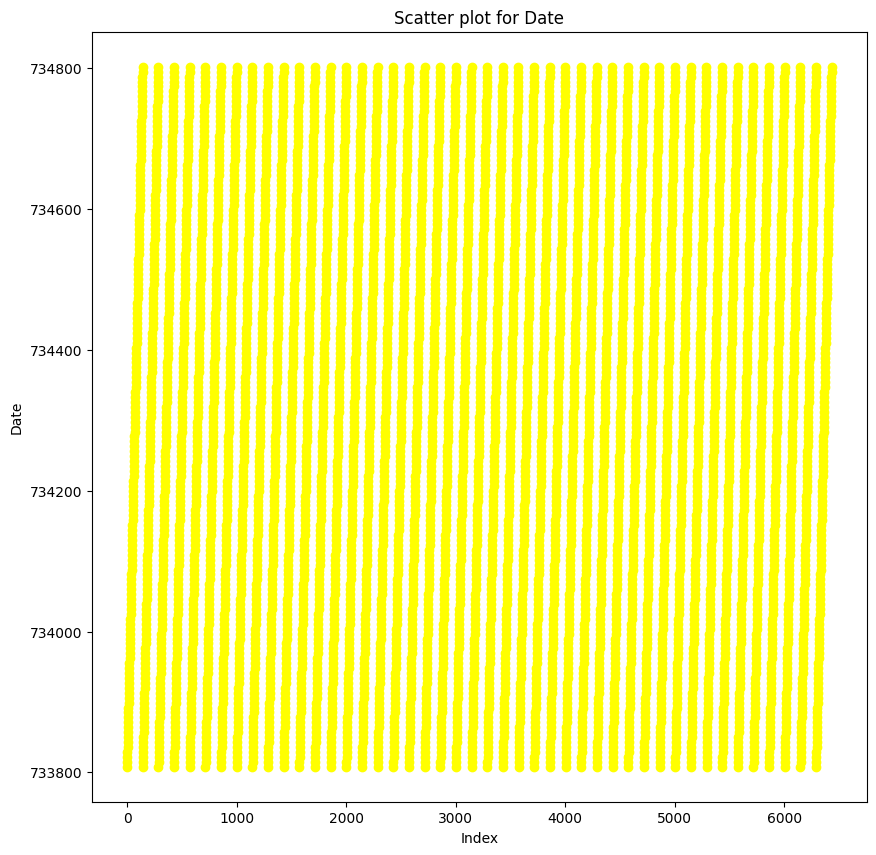

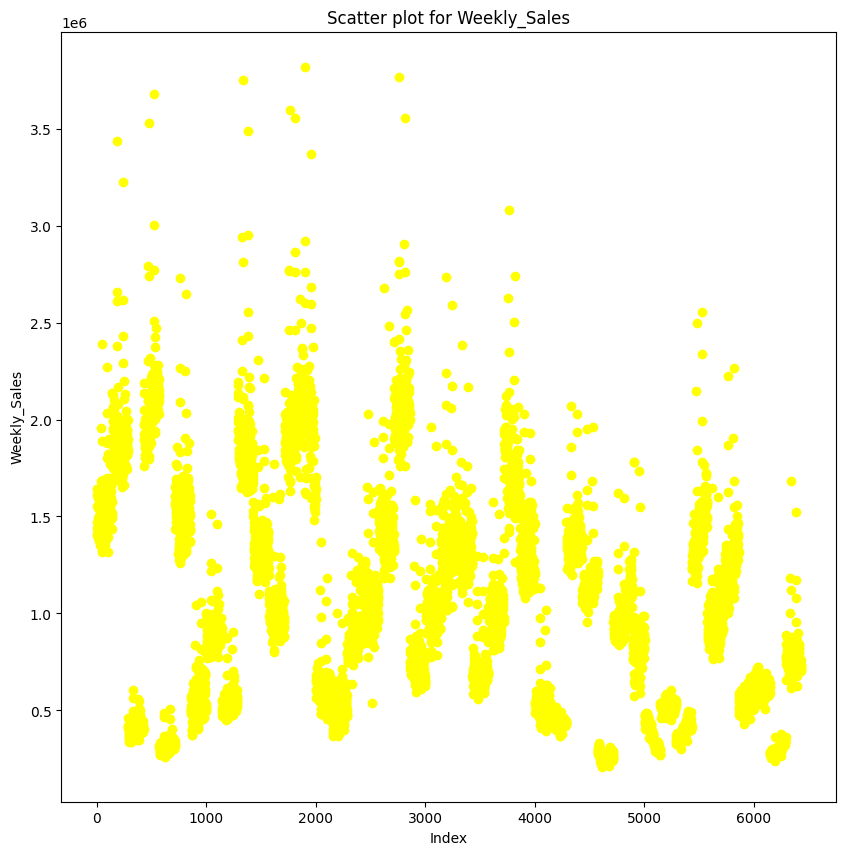

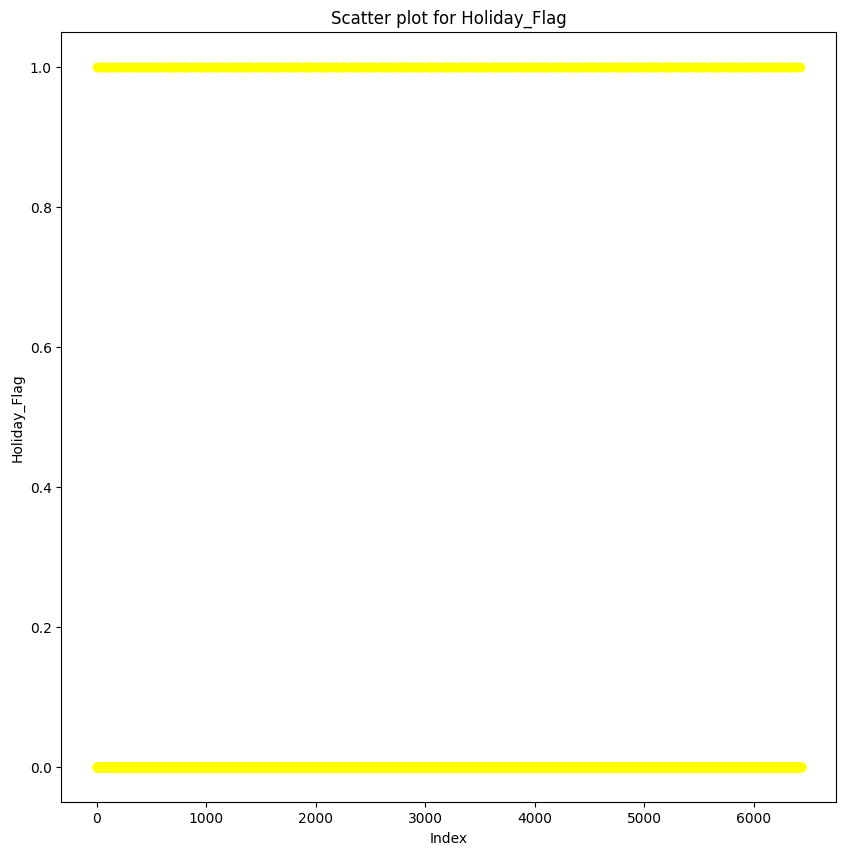

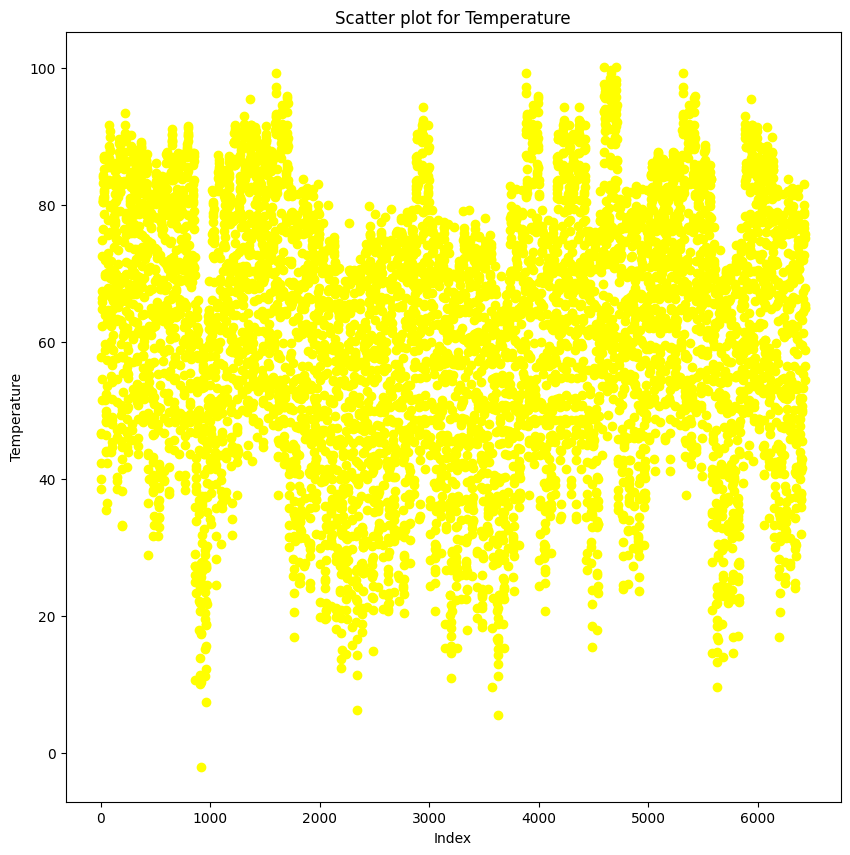

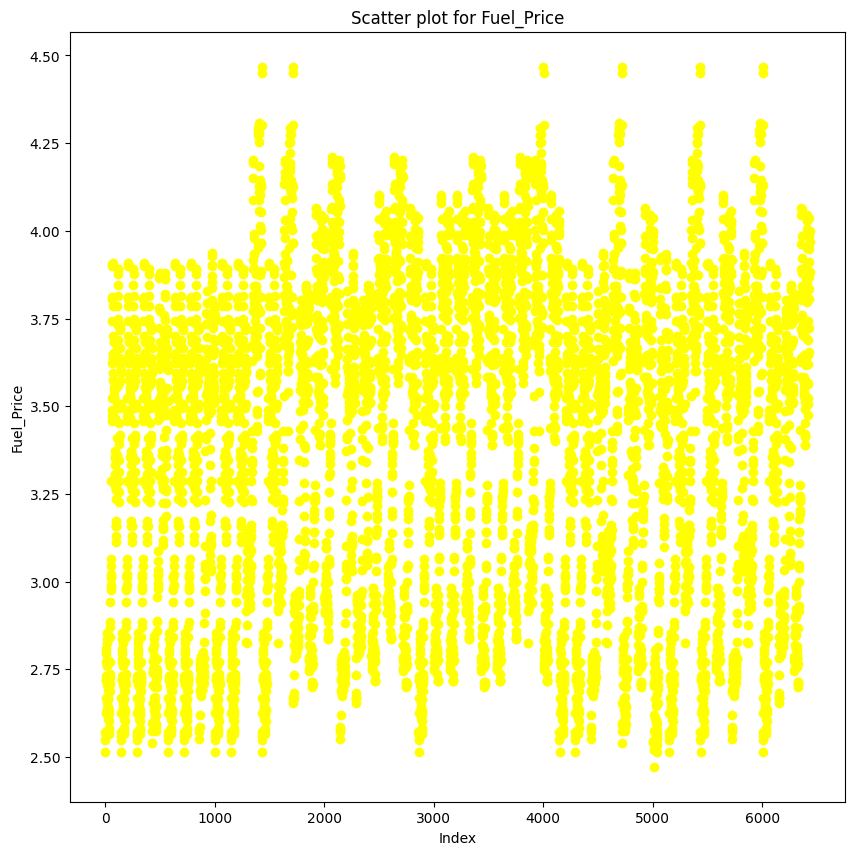

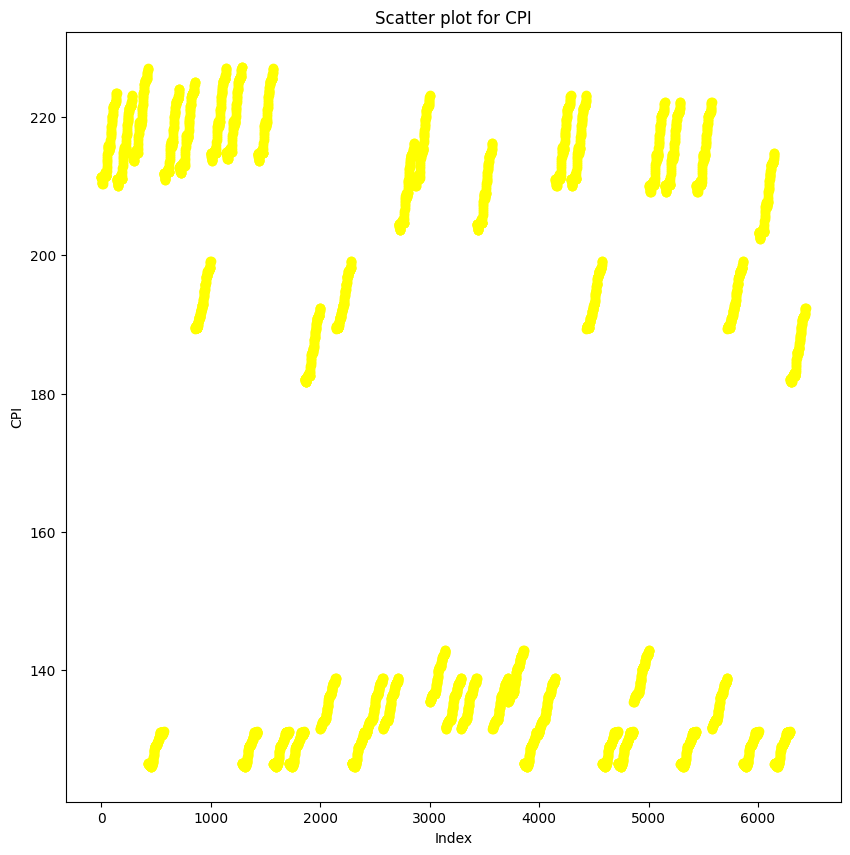

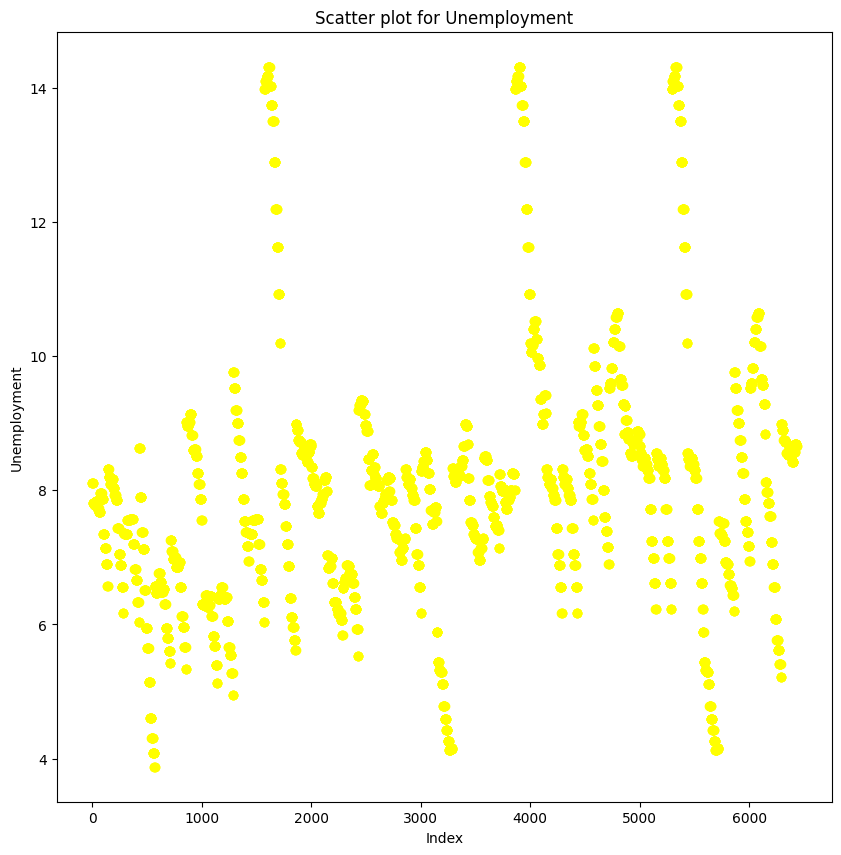

In [23]:
for column in df.columns:
    plt.figure(figsize=(10, 10), facecolor='white')
    plt.scatter(df.index, df[column], color='yellow')
    plt.title(f'Scatter plot for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

# <span style="color:red">CORRELATION COEFFICIENT

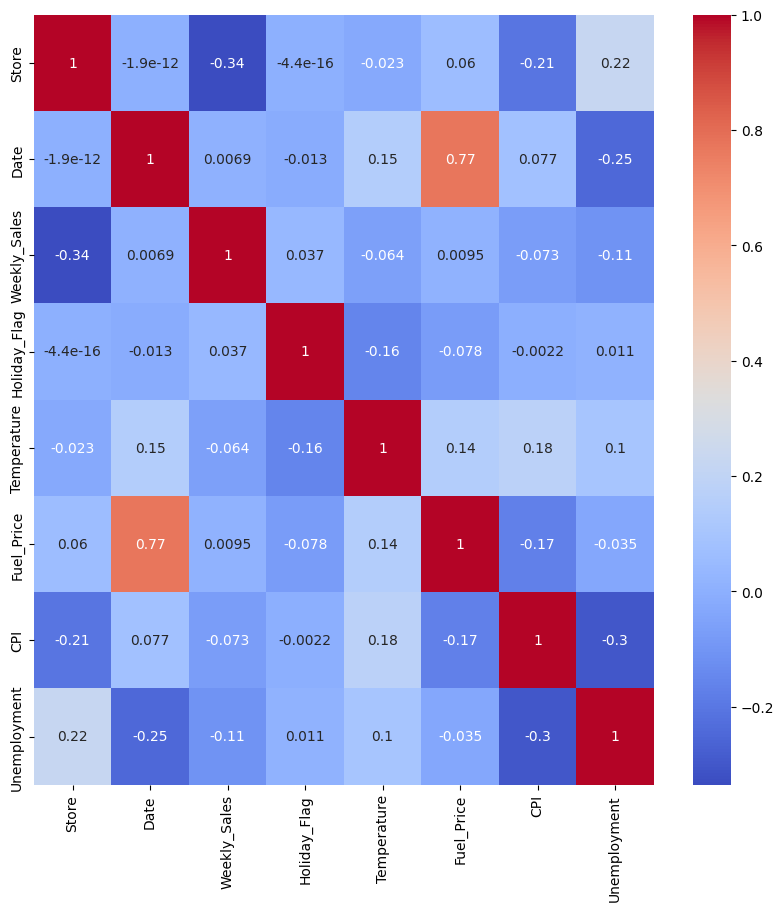

In [24]:
# Correlation matrix showing how variables depend on each other
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# <span style="color:red">COMMENTS ON DATA PROCESSING AND ANALYSIS

<span style="color:yellow">DESCRIPTIVE STATISTICS:

<span style="color:yellow">The Walmart dataset contains 6435 observations with information on weekly sales and other related factors. Weekly sales show great variation, indicating significant differences between weeks, possibly due to seasonal factors or holidays.

<span style="color:yellow">Only 7% of observations concern holiday periods, as shown by the Holiday_Flag variable, which may affect sales during these periods. Temperature ranges from -2.06°F to 100.14°F, with an average of 60.66°F, indicating the data covers different seasons and geographic areas.

<span style="color:yellow">Fuel price shows moderate variation, possibly affecting consumer purchasing habits. The Consumer Price Index (CPI) shows significant variation, with an average of 171.58, reflecting different economic conditions during data collection.

<span style="color:yellow">The unemployment rate ranges from 3.88% to 14.31%, with an average of 7.99%, showing various economic conditions that can affect sales.

<span style="color:yellow">PLOTS:

<span style="color:yellow">Histograms show the distribution of numeric variables, revealing that sales have great variation and some extreme values. Bar plots for categorical variables, such as Holiday_Flag, show most observations are not during holiday periods.

<span style="color:yellow">Scatter plots reveal the spread of values by row index. These plots help detect possible anomalies or outliers. For example, Weekly_Sales shows several spikes, possibly due to seasonal promotions or holidays.

<span style="color:yellow">The correlation matrix (correlation heatmap) shows relationships between variables. There is a slight negative correlation between unemployment and sales, suggesting increases in unemployment may negatively affect sales. Conversely, there is a positive correlation between sales and temperature, suggesting increases in temperature may lead to increased sales.

# <span style="color:red">ΟΡΙΣΜΟΣ ΜΕΤΑΒΛΗΤΩΝ ΠΟΥ ΘΑ ΧΡΗΣΙΜΟΠΟΙΗΘΟΥΝ ΣΤΑ ΜΟΝΤΕΛΑ

In [25]:
# Ορίζω όλες τις στήλες εκτός από την τελευταία ως χαρακτηριστικά 
X = df.drop('Weekly_Sales', axis=1)
X.head(5)

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,733808,0,42.31,2.57,211.10,8.11
1,1,733815,1,38.51,2.55,211.24,8.11
2,1,733822,0,39.93,2.51,211.29,8.11
3,1,733829,0,46.63,2.56,211.32,8.11
4,1,733836,0,46.50,2.62,211.35,8.11


In [26]:
#Παίρνω το συνολικό αριθμό των γραμμών και των στηλών των ανεξάρτητων μεταβλητών X του dataset
X.shape

(6435, 7)

In [27]:
#Θέτω την τελευταία στήλη του dataset ως την εξαρτημένη μεταβλητή Y και φέρνω τις πρώτες πέντε γραμμές
y = df['Weekly_Sales']
y.head(5)

0    1.64e+06
1    1.64e+06
2    1.61e+06
3    1.41e+06
4    1.55e+06
Name: Weekly_Sales, dtype: float64

In [28]:
#Δίνει τον τύπο δεδομένων της εξαρτημένης μεταβλητής Υ ως αντικείμενο κλάσης
type(y)

pandas.core.series.Series

# <span style="color:red">ΠΟΛΛΑΠΛΗ ΠΑΛΙΝΔΡΟΜΗΣΗ (STATSMODELS)

In [29]:
# Διαχωρισμός των δεδομένων σε σύνολα εκπαίδευσης και δοκιμής
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [30]:
# Ορίζει τη σταθερά του μοντέλου
X = sm.add_constant(X)

In [31]:
# Δημιουργία του μοντέλου πολλαπλής γραμμικής παλινδρόμησης
model = sm.OLS(y, X).fit()

In [32]:
#Visualization του μοντέλου (ANOVA Table, Coefficients, R-squared, etc.)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     151.4
Date:                Thu, 14 Aug 2025   Prob (F-statistic):          1.29e-207
Time:                        13:15:30   Log-Likelihood:                -93861.
No. Observations:                6435   AIC:                         1.877e+05
Df Residuals:                    6427   BIC:                         1.878e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          1.31e+05   2.88e+07      0.005   

In [33]:
#Πληροφορίες για τον τύπο του μοντέλου που χρησιμοποιήθηκε
type(model)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [34]:
#Η εντολή δίνει μια πιο συνοπτική παρουσίαση του μοντέλου
print(model.summary2())

                          Results: Ordinary least squares
Model:                   OLS                   Adj. R-squared:          0.141      
Dependent Variable:      Weekly_Sales          AIC:                     187737.8694
Date:                    2025-08-14 13:15      BIC:                     187792.0255
No. Observations:        6435                  Log-Likelihood:          -93861.    
Df Model:                7                     F-statistic:             151.4      
Df Residuals:            6427                  Prob (F-statistic):      1.29e-207  
R-squared:               0.142                 Scale:                   2.7372e+11 
-----------------------------------------------------------------------------------
                Coef.       Std.Err.      t     P>|t|      [0.025         0.975]   
-----------------------------------------------------------------------------------
const        130983.0446 28823413.6293   0.0045 0.9964 -56372510.5660 56634476.6553
Store        -1539

In [35]:
#Δίνει την παρουσίαση του μοντέλου με μια καλύτερη μορφή από την προηγούμενη δημιουργώντας έναν πίνακα
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     151.4
Date:                Thu, 14 Aug 2025   Prob (F-statistic):          1.29e-207
Time:                        13:15:30   Log-Likelihood:                -93861.
No. Observations:                6435   AIC:                         1.877e+05
Df Residuals:                    6427   BIC:                         1.878e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          1.31e+05   2.88e+07      0.005      0.996   -5.64e+07    5.66e+07
Store        -1.539e+04    522.474    -29.456      0.000   -1.64e+04   -1.44e+04
Date             2.5453     39.343      0.065      0.948     -74.580      79.671
Holiday_Flag  7.287e+04   2.61e+04      2.796      0.005    2.18e+04    1.24e+05
Temperature   -976.6306    376.483     -2.594      0.010   -1714.662    -238.599
Fuel_Price    8329.8915   2.45e+04      0.339      0.734   -3.98e+04    5.64e+04
CPI          -2322.3904    190.272    -12.206      0.000   -2695.387   -1949.393
Unemployment -2.181e+04   3947.592     -5.525      0.000   -2.95e+04   -1.41e+04
==============================================================================
Omnibus:                      188.978   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.272
Skew:                           0.435   Prob(JB):                     2.67e-45
Kurtosis:                       3.099   Cond. No.                     3.25e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#Εισάγει ένα dictionary το οποίο περιέχει τις τιμές κάποιων στατιστικών του μοντέλου πολλαπλής γραμμικής παλινδρόμησης
model.diagn 

{'jb': np.float64(205.27182465165697),
 'jbpv': np.float64(2.6655671757723022e-45),
 'skew': np.float64(0.43465055017607584),
 'kurtosis': np.float64(3.099489495575769),
 'omni': np.float64(188.97825667673874),
 'omnipv': np.float64(9.202227436196834e-42),
 'condno': np.float64(3245206911.579117),
 'mineigval': np.float64(0.0003294707252773539)}

In [37]:
#Επιστρέφει την τιμή του κριτηρίου Akaike του μοντέλου, που δείχνει την ποιότητα του μοντέλου σε σχέση με τον αριθμό των παραμέτρων του.
model.aic

np.float64(187737.86943758803)

In [38]:
#Επιστρέφει την τιμή των t-values των παραμέτρων του μοντέλου. Υψηλό t-value σημαίνει ότι η παράμετρος είναι σημαντική.
model.tvalues

const           4.54e-03
Store          -2.95e+01
Date            6.47e-02
Holiday_Flag    2.80e+00
Temperature    -2.59e+00
Fuel_Price      3.39e-01
CPI            -1.22e+01
Unemployment   -5.52e+00
dtype: float64

In [39]:
#Επιστρέφει τα p-values των παραμέτρων του μοντέλου. Χαμηλό p-value σημαίνει ότι η παράμετρος είναι σημαντική (p-value<0.05).
model.pvalues

const            9.96e-01
Store           5.30e-179
Date             9.48e-01
Holiday_Flag     5.19e-03
Temperature      9.51e-03
Fuel_Price       7.34e-01
CPI              6.87e-34
Unemployment     3.43e-08
dtype: float64

In [40]:
#Επιστρέφει τις τιμές των residuals του μοντέλου.
model.resid

0       347236.67
1       269439.06
2       314084.78
3       118049.14
4       262521.17
          ...    
6430     69890.23
6431     90256.77
6432     81311.08
6433     67174.26
6434    112310.43
Length: 6435, dtype: float64

In [41]:
#Δίνει περιγραφικά στατιστικά στοιχεία για τις τιμές των residuals του μοντέλου.
pd.Series(model.resid).describe().round(2)

count    6.44e+03
mean    -0.00e+00
std      5.23e+05
min     -1.03e+06
25%     -3.93e+05
50%     -3.78e+04
75%      3.72e+05
max      2.71e+06
dtype: float64

In [42]:
#Επιστρέψει το άθροισμα των τετραγωνικών καταλοίπων του μοντέλου.
model.ssr

np.float64(1759203836926067.2)

In [43]:
#Δίνει ένα καινούριο DataFrame με δυο στήλες όπου στη μια στήλη είναι οι πραγματικές τιμές του y και στην άλλη οι προβλεπόμενες τιμές του y 
compare_pred_df = pd.DataFrame({'actual_y': y, 'y_hat':model.fittedvalues})

#Επιστρέφει τι πρώτες 10 γραμμές του DataFrame
compare_pred_df.head(10)

,actual_y,y_hat
0,1.64e+06,1.30e+06
1,1.64e+06,1.37e+06
2,1.61e+06,1.30e+06
3,1.41e+06,1.29e+06
4,1.55e+06,1.29e+06
5,1.44e+06,1.28e+06
6,1.47e+06,1.29e+06
7,1.40e+06,1.29e+06
8,1.59e+06,1.29e+06
9,1.55e+06,1.28e+06


# <span style="color:red">ΔΙΑΓΡΑΜΜΑΤΑ ΠΟΛΛΑΠΛΗΣ ΠΛΑΙΝΔΡΟΜΗΣΗΣ

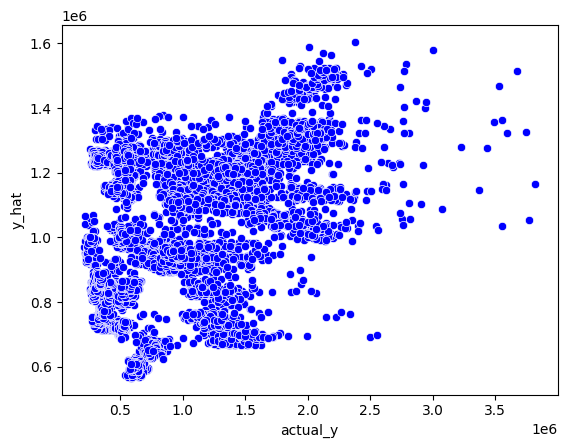

In [44]:
#Δημιουργεί ένα διάγραμμα αποκατανομής με τις πραγματικές τιμές του y στον άξονα x και τις προβλεπόμενες τιμές του y στον άξονα y
sns.scatterplot(x="actual_y", y="y_hat", color="b", data=compare_pred_df);

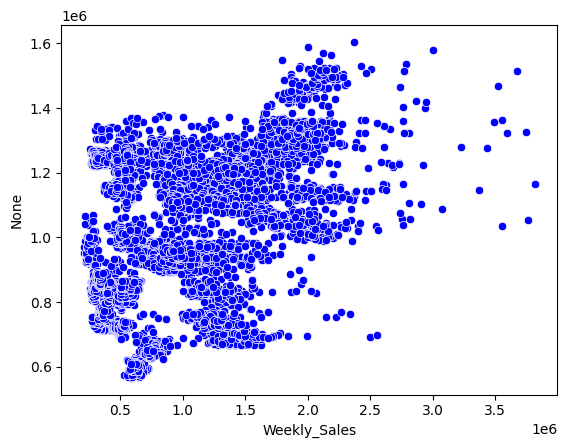

In [45]:
#Δημιουργεί ένα διάγραμμα διασποράς με τις πραγματικές τιμές της εξαρτημένης μεταβλητής TenYearCHD στον άξονα x και τις προβλεπόμενες τιμές της στον άξονα y
sns.scatterplot(x=y, y=model.fittedvalues, color="b");

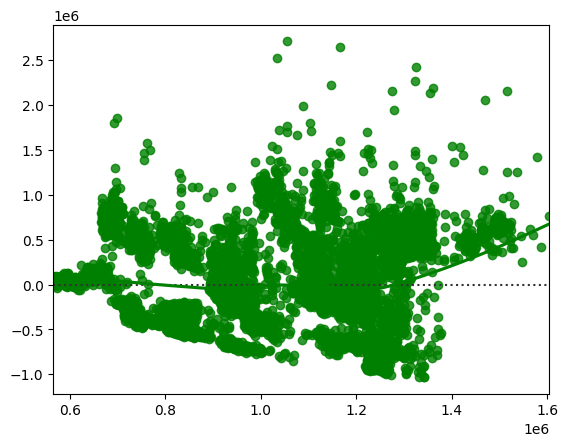

In [46]:
#Δημιουργεί ένα διάγραμμα των τετραγωνικών καταλοίπων του μοντέλου σε σχέση με τις προβλεπόμενες τιμές του y
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, color="g");

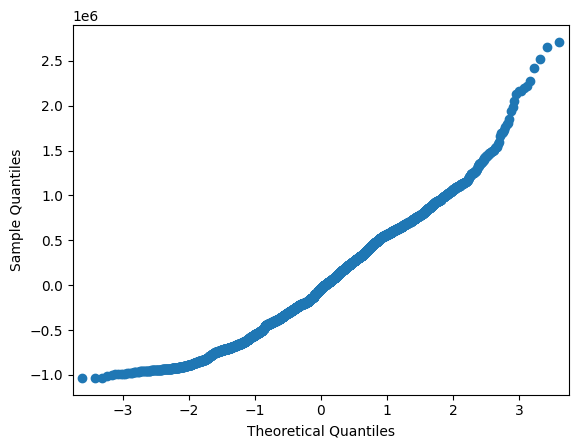

In [47]:
#Δημιουργεί ένα Q-Q plot για τις τιμές των residuals του μοντέλου ώστε να διαπιστωθεί αν ακολουθούν κανονική κατανομή
sm.qqplot(model.resid)
plt.show()

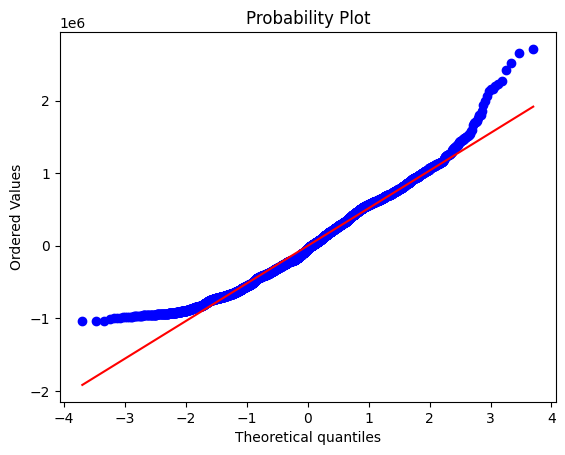

In [48]:
#Δημιουργεί ένα διάγραμμα πυκνότητας πιθανότητας για τις τιμές των residuals του μοντέλου για να διαπιστωθεί αν ακολουθούν κανονική κατανομή
stats.probplot(model.resid, plot=sns.mpl.pyplot);

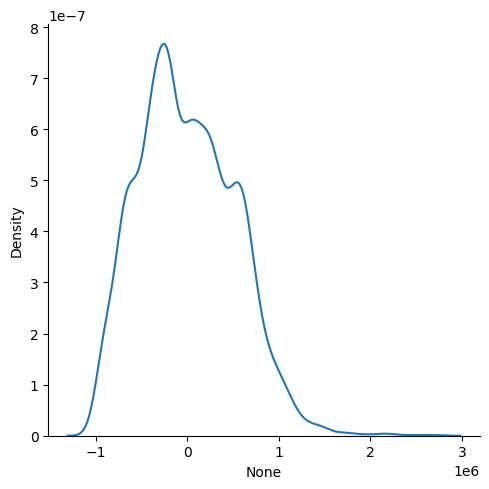

In [49]:
#Δημιουργεί ένα διάγραμμα κατανομής των καταλοίπων του μοντέλου που δείχνει πως κατανέμονται οι τιμές τους 
sns.displot(x=model.resid, kind="kde");

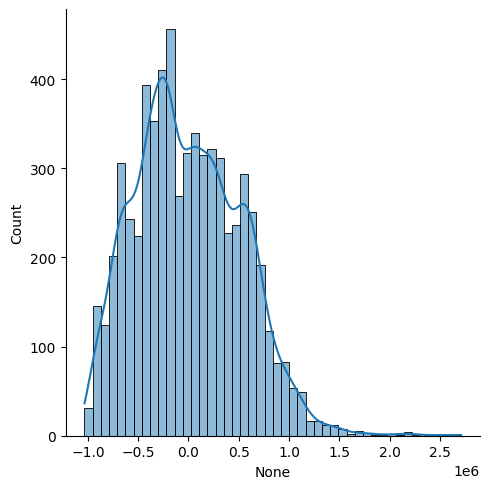

In [50]:
##Δημιουργεί ένα διάγραμμα κατανομής των καταλοίπων του μοντέλου που δείχνει πως κατανέμονται οι τιμές τους δημιουργώντας, επιπλέον, ένα ιστόγραμμα κάτω από την καμπύλη κατανομής 
sns.displot(x=model.resid, kde=True);

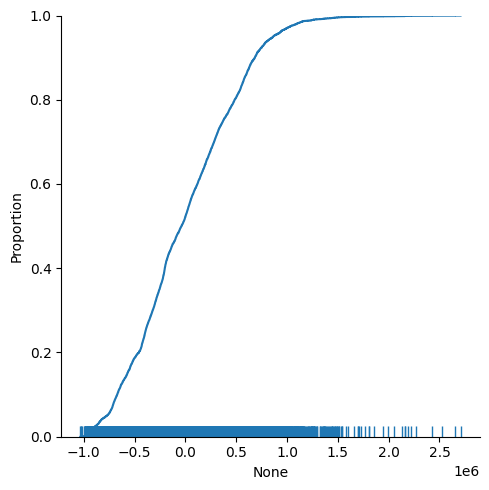

In [51]:

#Δημιουργεί ένα γράφημα αθροιστικής κατανομής των καταλοίπων του μοντέλου που δείχνει πως κατανέμονται οι τιμές τους
sns.displot(x=model.resid, kind="ecdf", rug=True);

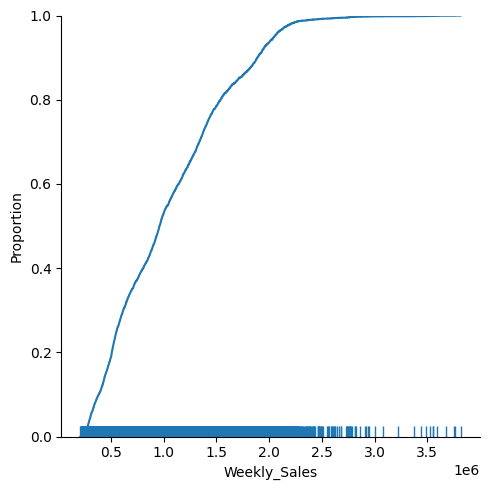

In [52]:
#Δημιουργεί ένα γράφημα αθροιστικής κατανομής των καταλοίπων του μοντέλου που δείχνει πως κατανέμονται οι τιμές τους χρησιμοποιώντας ευθείες αντί για συνεχή γραμμή
sns.displot(x=y, kind="ecdf",  rug=True);

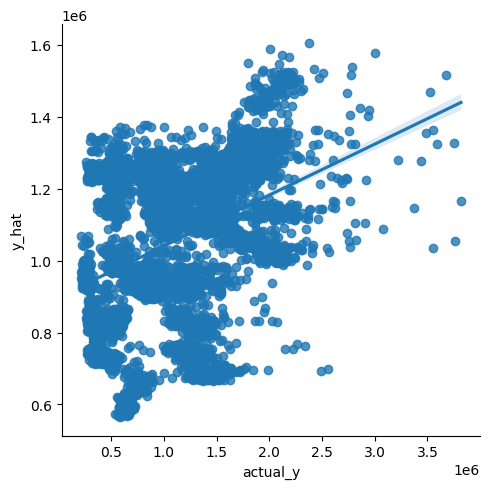

In [53]:
# Μετατρέπει τα 'actual_y' και 'y_hat' σε αριθμητικές τιμές από αλφαριθμητικές
compare_pred_df['actual_y'] = pd.to_numeric(compare_pred_df['actual_y'])
compare_pred_df['y_hat'] = pd.to_numeric(compare_pred_df['y_hat'])

# Δημιουργεί ένα γράφημα διασποράς μεταξύ των πραγματικών τιμών και των προβλεπόμενων τιμών του y με την ένταξη της γραμμής της ευθείας παλινδρόμησης στο γράφημα
sns.lmplot(x="actual_y", y="y_hat", data=compare_pred_df)

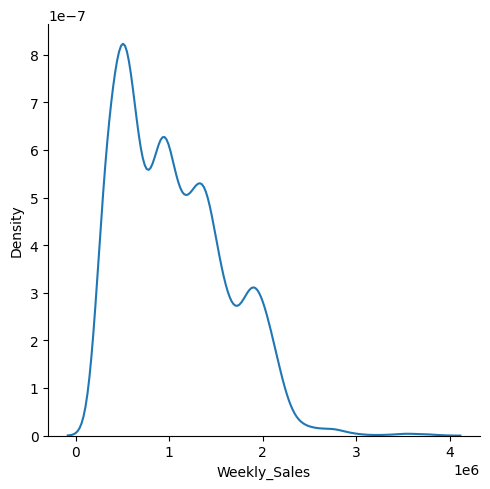

In [54]:
#Μετατρέπει το 'y' σε αριθμητικές τιμές από αλφαριθμητικές
y = pd.to_numeric(y, errors='coerce')

# Δημιουργεί το διάγραμμα κατανομής πιθανότητας της εξαρτημένης μεταβλητής TenYearCHD
sns.displot(x=y, kind="kde")
plt.show()

# <span style="color:red">ΑΦΑΙΡΕΣΗ ΜΗ ΣΤΑΤΙΣΤΙΚΑ ΣΗΜΑΝΤΙΚΩΝ ΜΕΤΑΒΛΗΤΩΝ ΑΠΟ ΤΟ ΜΟΝΤΕΛΟ


In [55]:
# Επαναπροσδιορισμός του μοντέλου με τις σημαντικότερες μεταβλητές
X = df[['Store','Holiday_Flag','Temperature','CPI','Unemployment']]
X = sm.add_constant(X)

# Δημιουργία του μοντέλου πολλαπλής γραμμικής παλινδρόμησης
ols_results = sm.OLS(y, X).fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     211.9
Date:                Thu, 14 Aug 2025   Prob (F-statistic):          7.51e-210
Time:                        13:15:37   Log-Likelihood:                -93861.
No. Observations:                6435   AIC:                         1.877e+05
Df Residuals:                    6429   BIC:                         1.878e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.032e+06   5.07e+04     40.114      0.000    1.93e+06    2.13e+06
Store        -1.537e+04    521.337    -29.488      0.000   -1.64e+04   -1.44e+04
Holiday_Flag  7.222e+04   2.59e+04      2.787      0.005    2.14e+04    1.23e+05
Temperature   -929.0252    369.081     -2.517      0.012   -1652.547    -205.503
CPI          -2345.9264    180.191    -13.019      0.000   -2699.160   -1992.693
Unemployment  -2.22e+04   3755.948     -5.910      0.000   -2.96e+04   -1.48e+04
==============================================================================
Omnibus:                      188.685   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.924
Skew:                           0.434   Prob(JB):                     3.17e-45
Kurtosis:                       3.100   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# <span style="color:red">ΚΑΘΟΡΙΣΜΟΣ ΑΚΡΙΒΕΙΑΣ ΤΟΥ ΜΟΝΤΕΛΟΥ

In [56]:
#Καθορισμός ακριβείας του μοντέλου
pd.set_option("display.precision", 2)

# <span style="color:red">ΕΙΣΑΓΩΓΗ ΚΑΙ ΕΠΕΞΕΡΓΑΣΙΑ ΤΟΥ ΑΡΧΕΙΟΥ ΠΟΥ ΕΙΝΑΙ ΑΠΑΡΑΙΤΗΤΟ ΓΙΑ ΤΗΝ ΕΚΤΕΛΕΣΗ ΤΟΥ ΑΛΓΟΡΙΘΜΟΥ

In [57]:
#Αναγνώριση του αρχείου και εισαγωγή του στο πρόγραμμα
df = pd.read_csv('data/framingham.csv')

#Δημιουργία DataFrame
df.head() 

#Δίνει την εκτύπωση των πέντε πρώτων στηλών των δεδομένων
print(df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

# <span style="color:red">ΣΥΝΟΠΤΙΚΗ ΠΑΡΟΥΣΙΑΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ ΠΡΙΝ ΑΠΟ ΤΗΝ ΑΦΑΙΡΕΣΗ ΤΟΝ ΤΙΜΩΝ ΠΟΥ ΤΕΙΝΟΥΝ ΣΤΟ ΑΠΕΙΡΟ ΚΑΙ ΤΩΝ ΤΙΜΩΝ NaN

In [58]:
#Επιστρέφει το σύνολο των γραμμών του αρχείου στο οποίο βρίσκονται τα δεδομένα
len(df)

4238

In [59]:
#Επιστρέφει τα ονόματα των στηλών του αρχείου στο οποίο βρίσκονται τα δεδομένα
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [60]:
#Δίνει τον τύπο των δεδομένων που περιέχονται στις στήλες του αρχείου
#To dataset αποτελείται από 16 στήλες εκ των οποίων οι 7 στήλες είναι κατηγορικές μεταβλητές που είναι της μορφής 0 ή 1 και οι υπόλοιπες 9 στήλες είναι ποσοτικές μεταβλητές 
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [61]:
#Ορίζει της μεταβλητές που περιέχουν τιμές 0 και 1 ως κατηγορικές για λόγους παρουσίασης και κατανόησης των δεδομένων. Η εντολή θα εκτελεστεί στην επόμενη ενότητα μετά την καθαρισμό των τιμών που τείνουν στο άπειρο και των τιμών NaN καθώς το πρόγραμμα δε θα μπορεί να τρέξει την εντολή για τον έλεγχο των τιμών που τείνουν στο άπειρο αν υπάρχουν κατηγορικές μεταβλητές στο dataset.

#for column in df.columns:
    #if set(df[column].unique()) == {0, 1}:
        #df[column] = df[column].astype('category')

In [62]:
#Επιστρέφει τα στατιστικά περιγραφικά στοιχεία κάθε μεταβλητής του dataset
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.00,4238.00,4133.00,4238.00,4209.00,4185.00,4.24e+03,4238.00,4238.00,4188.00,4238.00,4238.00,4219.00,4237.00,3850.00,4238.00
mean,0.43,49.58,1.98,0.49,9.00,0.03,5.90e-03,0.31,0.03,236.72,132.35,82.89,25.80,75.88,81.97,0.15
std,0.50,8.57,1.02,0.50,11.92,0.17,7.66e-02,0.46,0.16,44.59,22.04,11.91,4.08,12.03,23.96,0.36
min,0.00,32.00,1.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,107.00,83.50,48.00,15.54,44.00,40.00,0.00
25%,0.00,42.00,1.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,206.00,117.00,75.00,23.07,68.00,71.00,0.00
50%,0.00,49.00,2.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,234.00,128.00,82.00,25.40,75.00,78.00,0.00
75%,1.00,56.00,3.00,1.00,20.00,0.00,0.00e+00,1.00,0.00,263.00,144.00,89.88,28.04,83.00,87.00,0.00
max,1.00,70.00,4.00,1.00,70.00,1.00,1.00e+00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


In [63]:
#Εκτυπώνει το είδος της κάθε μεταβλητής του dataset 
print(df.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


# <span style="color:red">ΕΠΕΞΕΡΓΑΣΙΑ ΤΟΥ DATASET ΚΑΙ ΕΚΑΘΑΡΙΣΜΟΣ ΤΩΝ ΤΙΜΩΝ ΠΟΥ ΤΕΙΝΟΥΝ ΣΤΟ ΑΠΕΙΡΟ ΚΑΙ ΤΩΝ ΤΙΜΩΝ NaN

In [64]:
#Εκτυπώνει το είδος της κάθε μεταβλητής του dataset 
print(df.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


# <span style="color:red">ΕΠΕΞΕΡΓΑΣΙΑ ΤΟΥ DATASET ΚΑΙ ΕΚΑΘΑΡΙΣΜΟΣ ΤΩΝ ΤΙΜΩΝ ΠΟΥ ΤΕΙΝΟΥΝ ΣΤΟ ΑΠΕΙΡΟ ΚΑΙ ΤΩΝ ΤΙΜΩΝ NaN

In [65]:
# Ελέγχει αν υπάρχουν τιμές στο dataset που τείνουν στο άπειρο
if np.any(np.isinf(df)):
    print("Data contains infinite values. Replacing them with NaN.")
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [66]:
# Ελέγχει αν υπάρχουν τιμές NaN στο dataset. 
# Αν τρέξω την εντολή πριν από την παρουσίαση των δεδομένων που βρίσκεται στη συνέχεια η παρουσίαση θα γίνει χωρίς αυτές τις τιμές. Καλό θα ήταν η εντολή να τρέξει μετά την παρουσίαση των δεδομένων ώστε να μπορούν να τρέξουν και τα μοντέλα.
if df.isnull().values.any():
    print("Data contains NaN values. Please handle missing data before proceeding.")
    df.dropna(inplace=True)

Data contains NaN values. Please handle missing data before proceeding.


# <span style="color:red">ΣΥΝΟΠΤΙΚΗ ΠΑΡΟΥΣΙΑΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

In [67]:
#Επιστρέφει το σύνολο των γραμμών του αρχείου στο οποίο βρίσκονται τα δεδομένα
len(df)

3656

In [68]:
#Επιστρέφει τα ονόματα των στηλών του αρχείου στο οποίο βρίσκονται τα δεδομένα
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [69]:
#Δίνει τον τύπο των δεδομένων που περιέχονται στις στήλες του αρχείου
#To dataset αποτελείται από 16 στήλες εκ των οποίων οι 7 στήλες είναι κατηγορικές μεταβλητές που είναι της μορφής 0 ή 1 και οι υπόλοιπες 9 στήλες είναι ποσοτικές μεταβλητές 
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [70]:
#Ορίζει της μεταβλητές που περιέχουν τιμές 0 και 1 ως κατηγορικές για λόγους παρουσίασης και κατανόησης των δεδομένων
for column in df.columns:
    if set(df[column].unique()) == {0, 1}:
        df[column] = df[column].astype('category')

In [71]:
#Επιστρέφει τα στατιστικά περιγραφικά στοιχεία κάθε μεταβλητής του dataset
df.describe()

,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00
mean,49.56,1.98,9.02,236.87,132.37,82.91,25.78,75.73,81.86
std,8.56,1.02,11.92,44.10,22.09,11.97,4.07,11.98,23.91
min,32.00,1.00,0.00,113.00,83.50,48.00,15.54,44.00,40.00
25%,42.00,1.00,0.00,206.00,117.00,75.00,23.08,68.00,71.00
50%,49.00,2.00,0.00,234.00,128.00,82.00,25.38,75.00,78.00
75%,56.00,3.00,20.00,263.25,144.00,90.00,28.04,82.00,87.00
max,70.00,4.00,70.00,600.00,295.00,142.50,56.80,143.00,394.00


In [72]:
#Εκτυπώνει το είδος της κάθε μεταβλητής του dataset 
print(df.dtypes)

male               category
age                   int64
education           float64
currentSmoker      category
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD         category
dtype: object


# <span style="color:red">ΔΙΑΓΡΑΜΜΑΤΑ

<span style="color:yellow">Ιστογράμματα

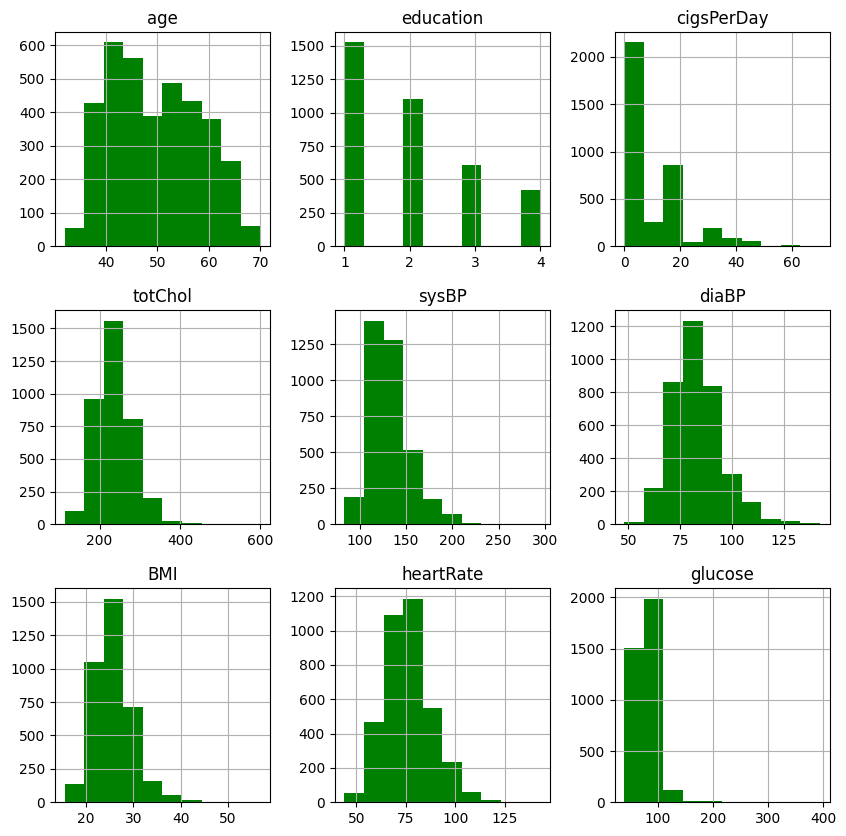

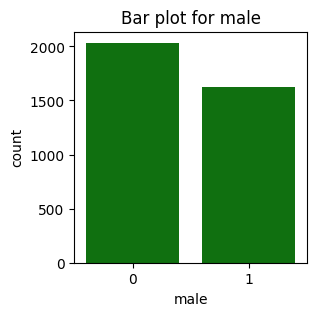

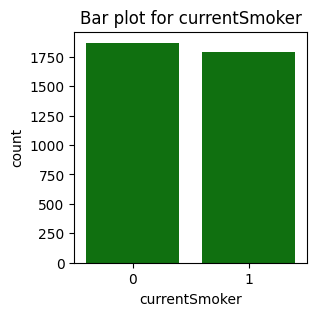

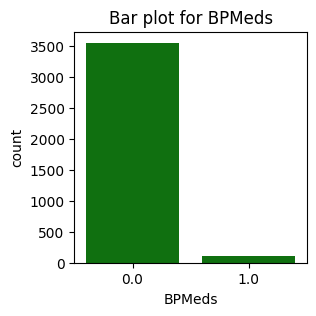

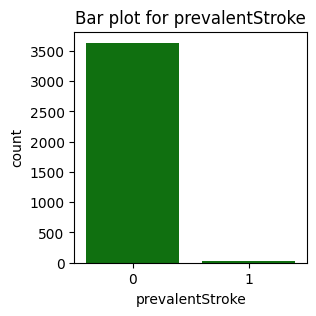

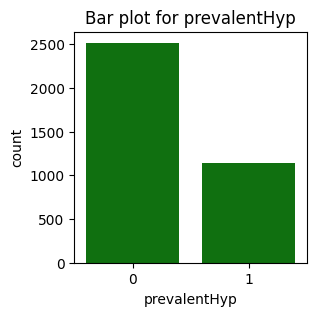

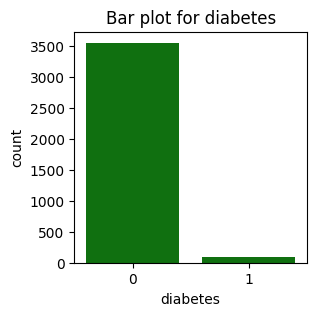

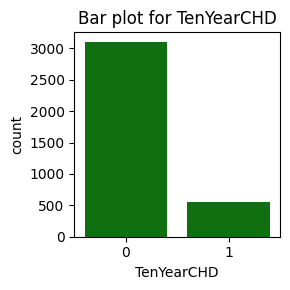

In [73]:
# Ιστογράμματα για την παρουσίαση της συχνότητας των τιμών που παρουσιάζει η κάθε μεταβλητή
df.hist(figsize=(10, 10), color='green')
categorical_cols = df.select_dtypes(include=['category']).columns

for col in categorical_cols:
    plt.figure(figsize=(3, 3))
    sns.countplot(x=df[col], color='green')
    plt.title(f'Bar plot for {col}')
    
plt.tight_layout()
plt.show()

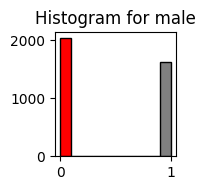

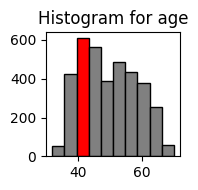

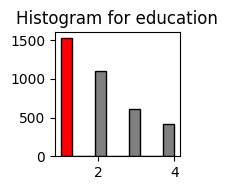

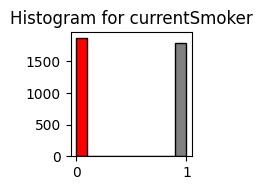

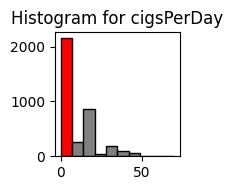

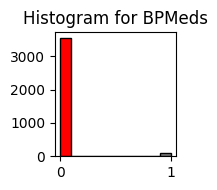

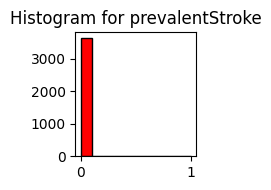

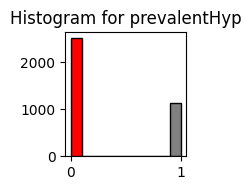

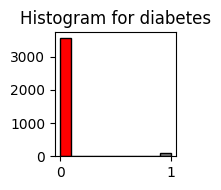

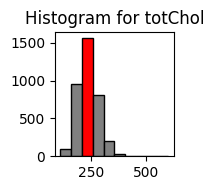

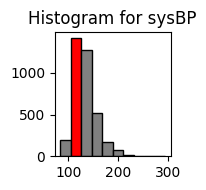

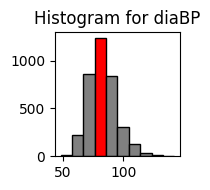

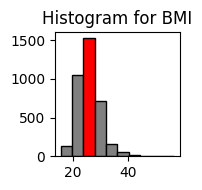

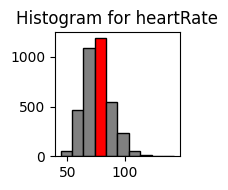

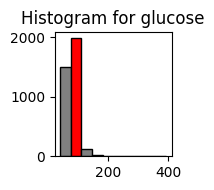

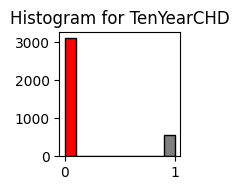

In [74]:
# Δημιουργία ιστογραμμάτων όπου η κλάση με τη μεγαλύτερη συχνότητα έχει διαφορετικό χρώμα
for col in df.select_dtypes(include=['float64', 'int64','category']).columns:
    plt.figure(figsize=(2, 2))
    counts, bins, patches = plt.hist(df[col], color='grey', edgecolor='black')

    #Υπολογισμός του bin με τη μεγαλύτερη συχνότητα
    max_freq_index = np.argmax(counts)

    #Αλλαγή του χρώματος του bin με τη μεγαλύτερη συχνότητα
    patches[max_freq_index].set_fc('red')

    plt.title(f'Histogram for {col}')
    plt.tight_layout()
    plt.show()

<span style="color:yellow">Διαγράμματα Διασποράς

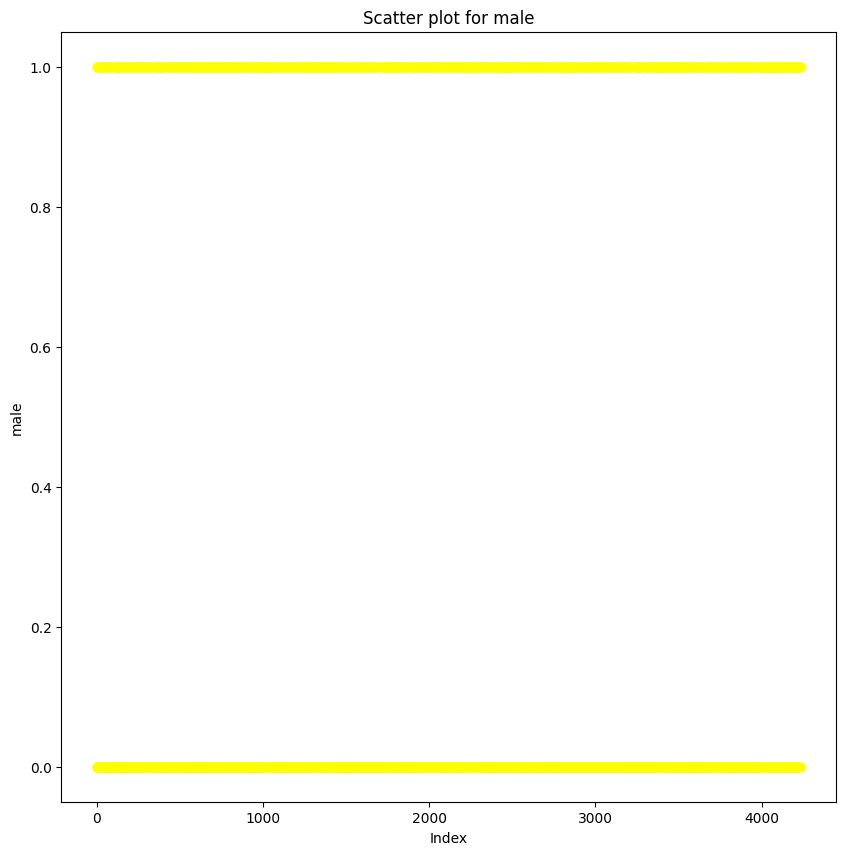

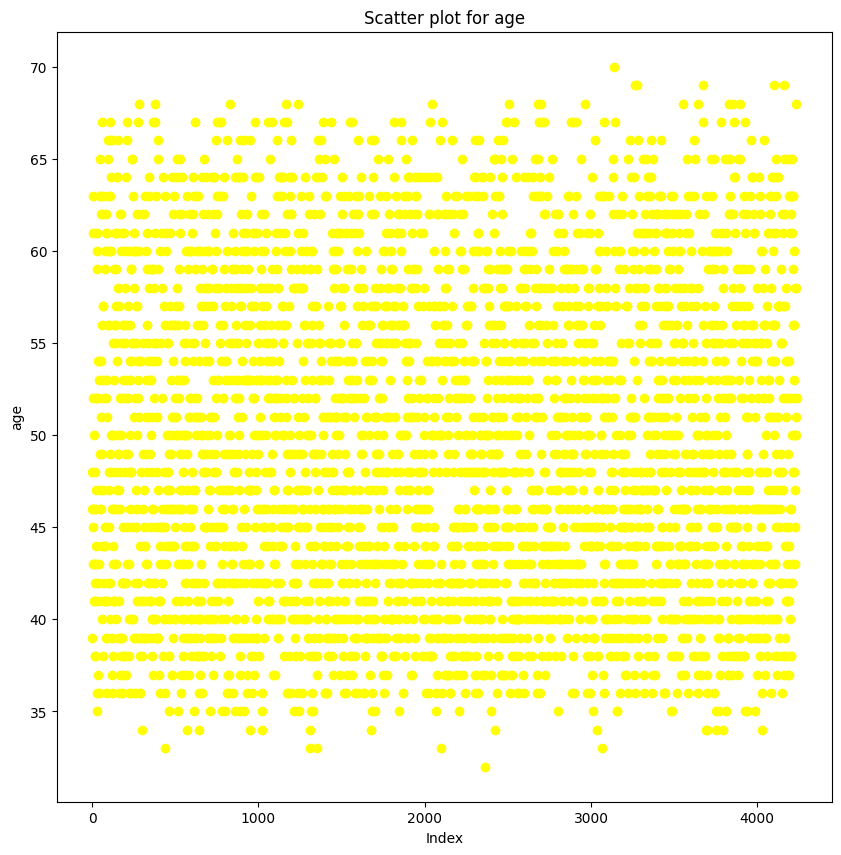

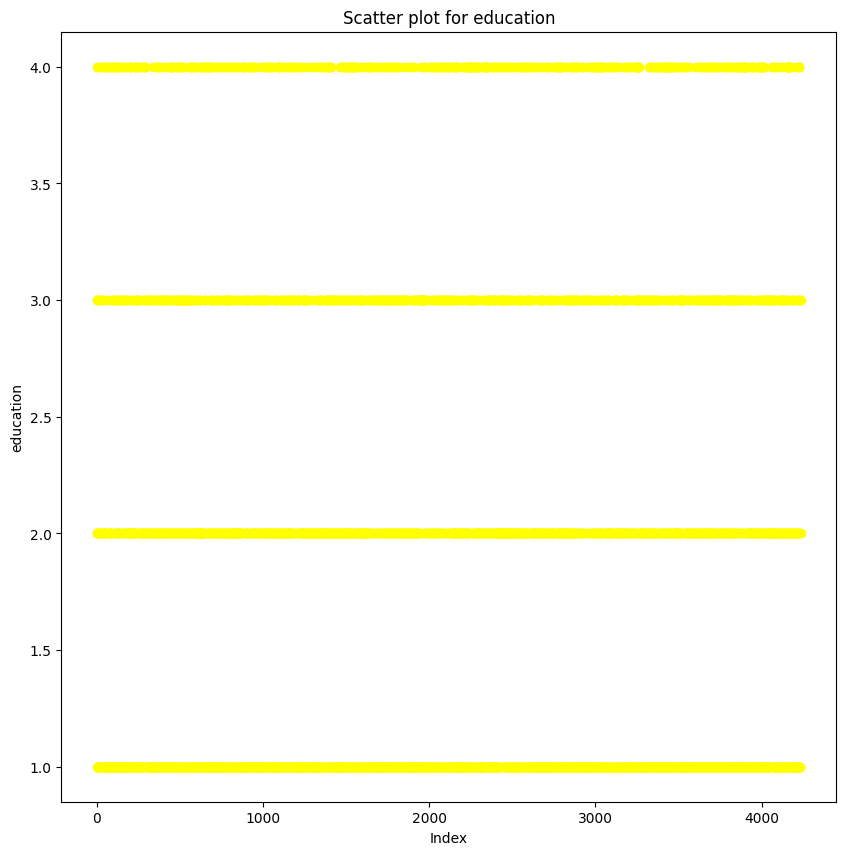

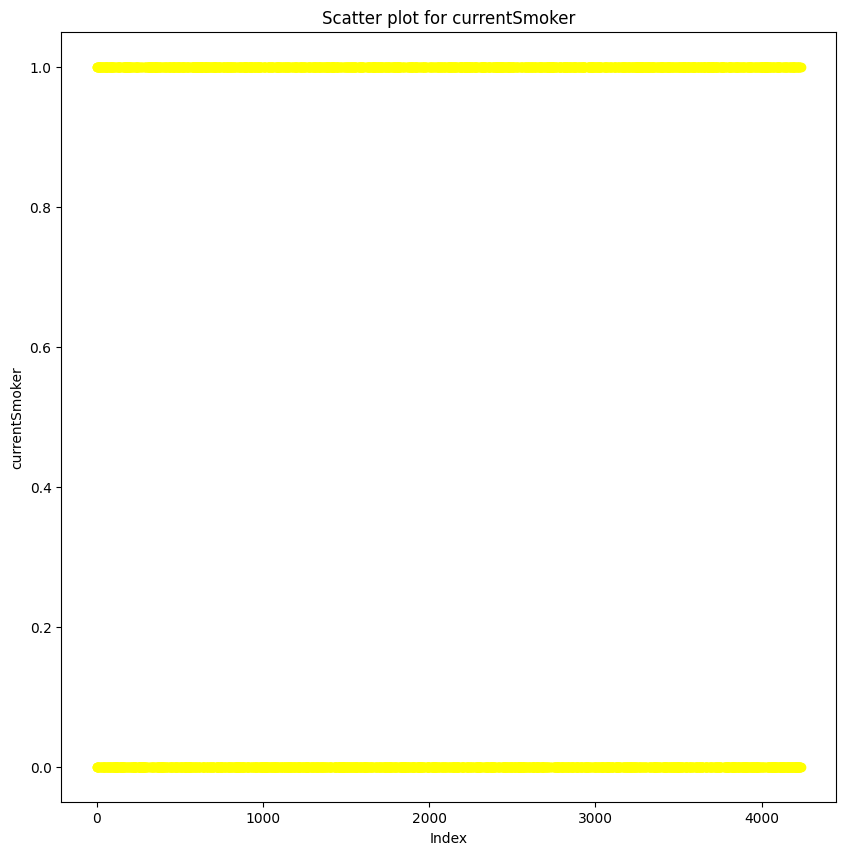

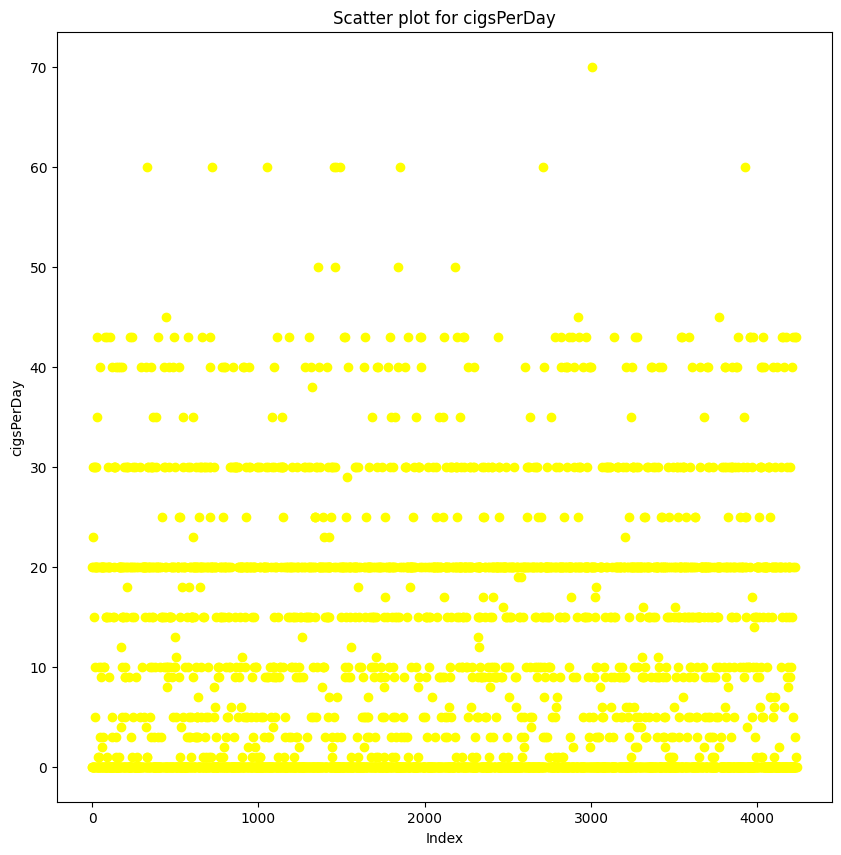

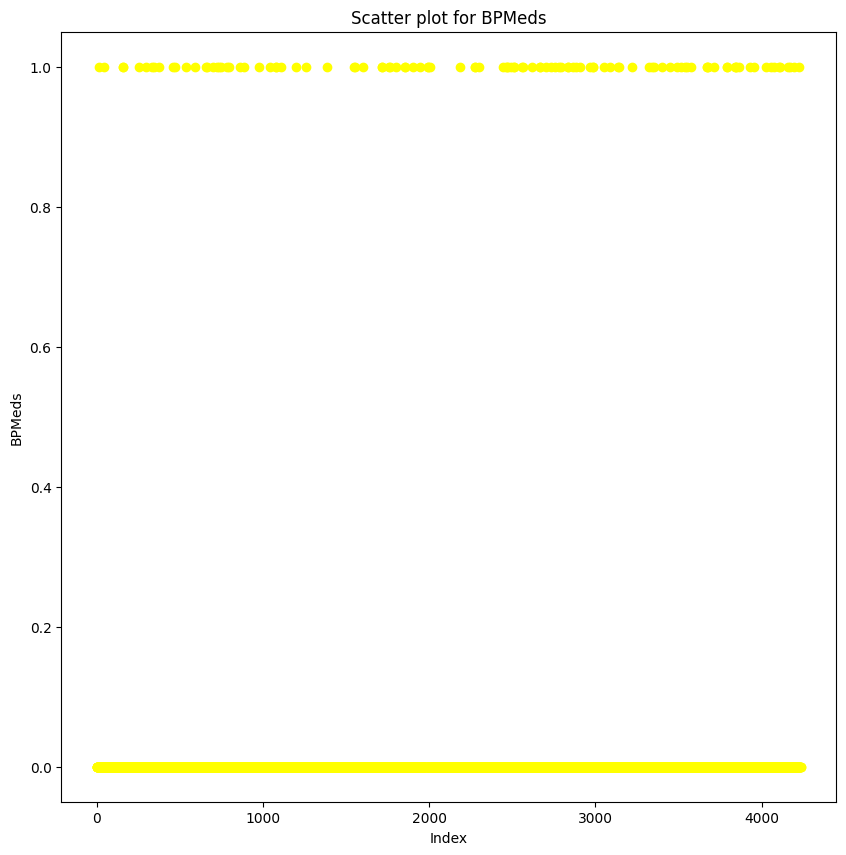

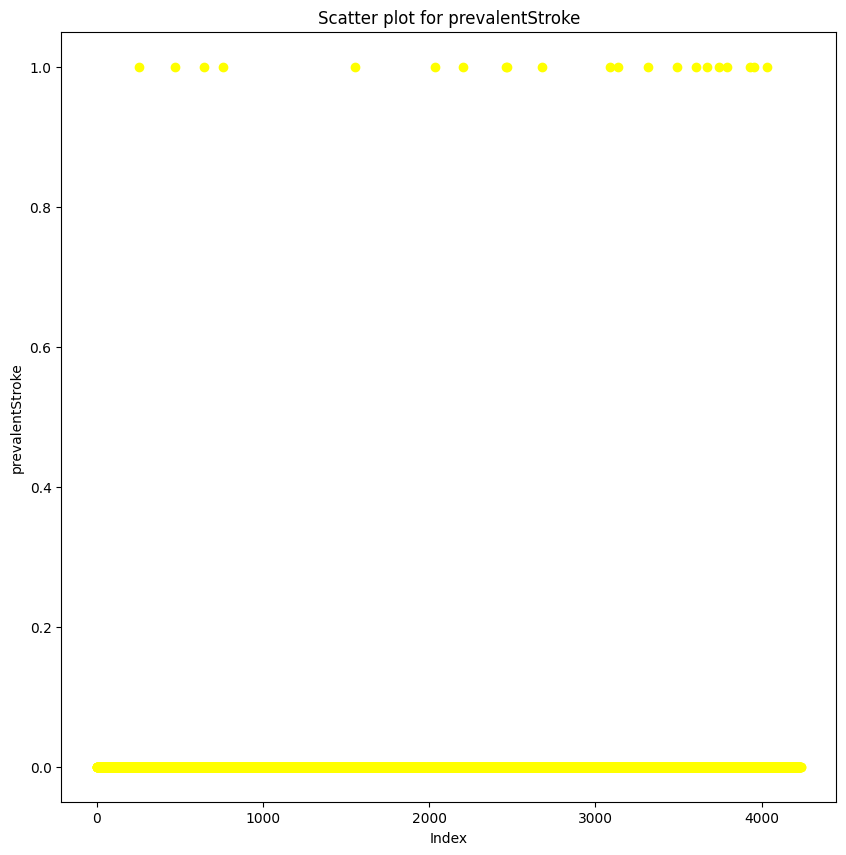

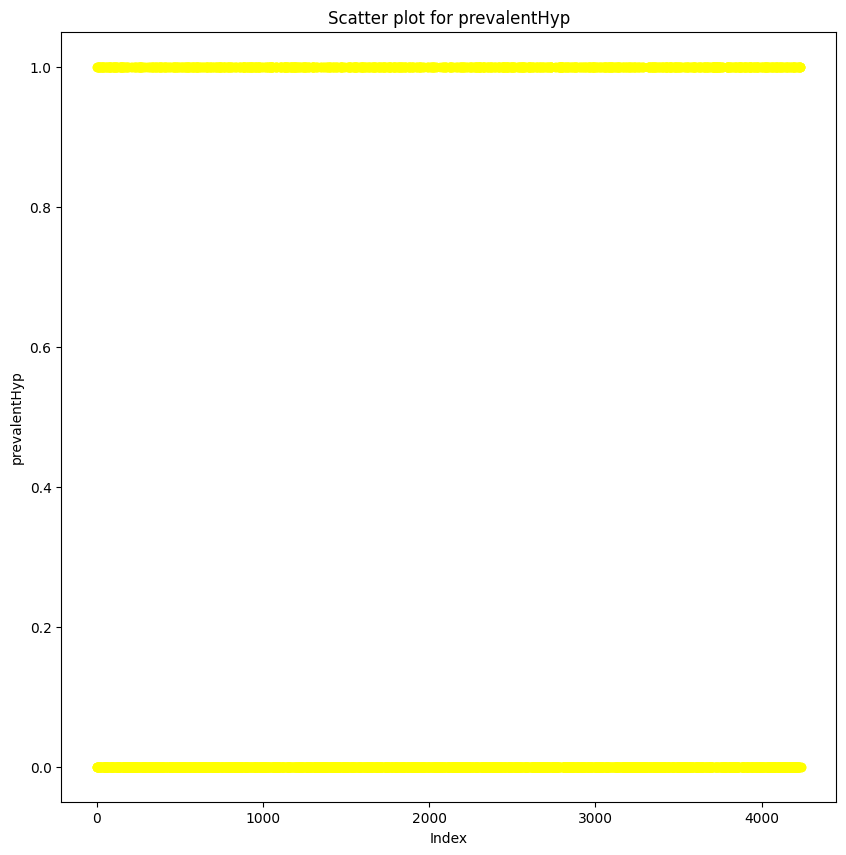

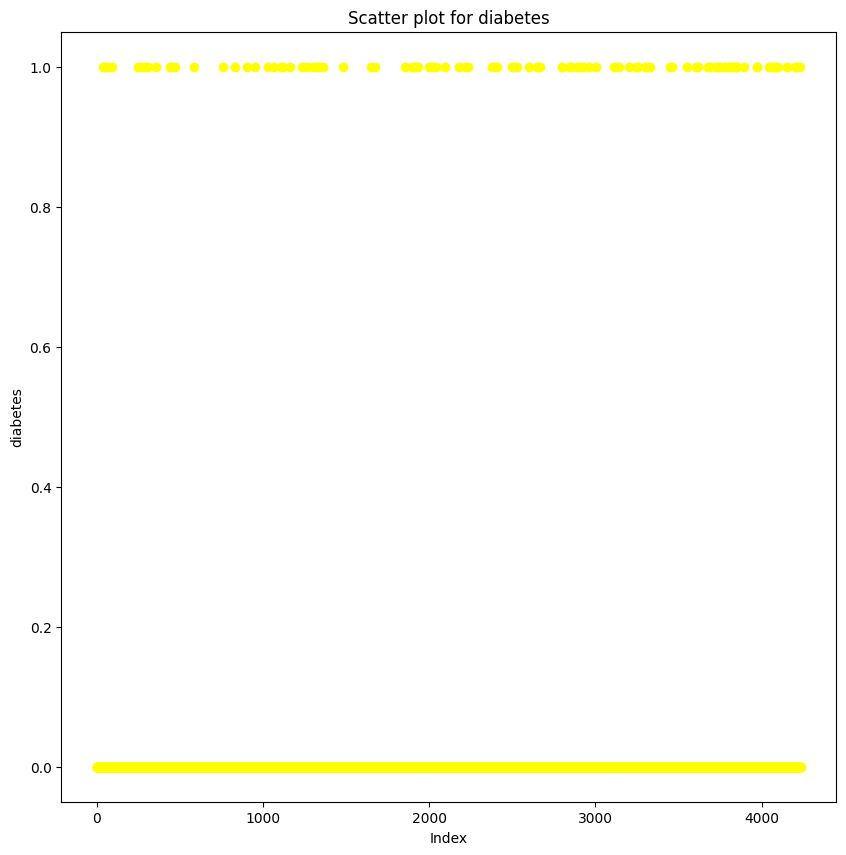

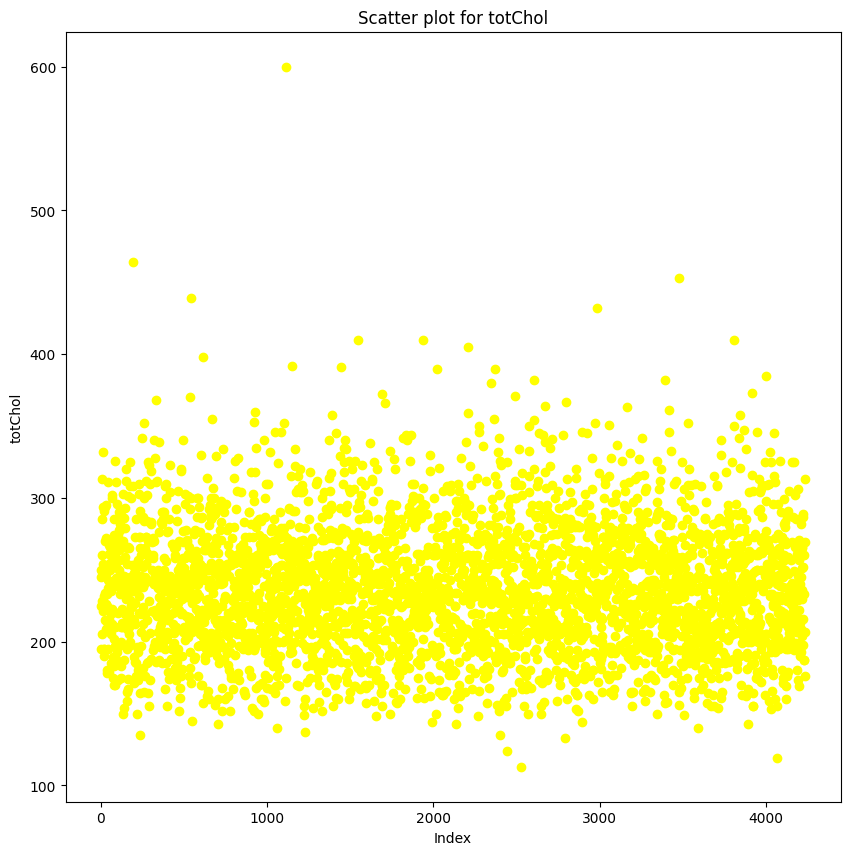

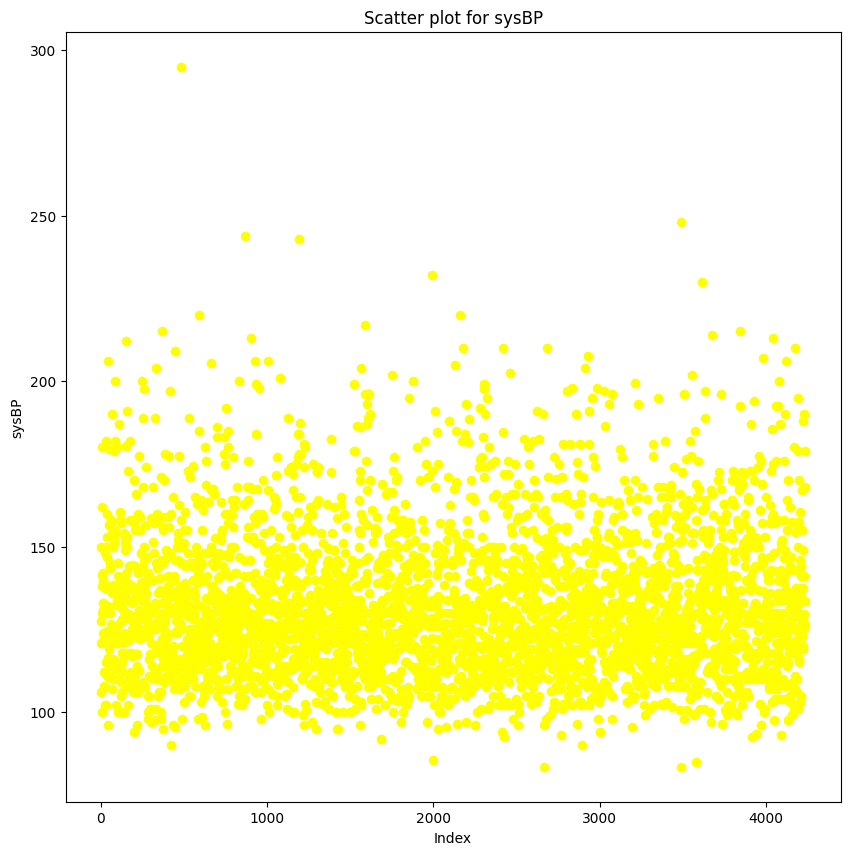

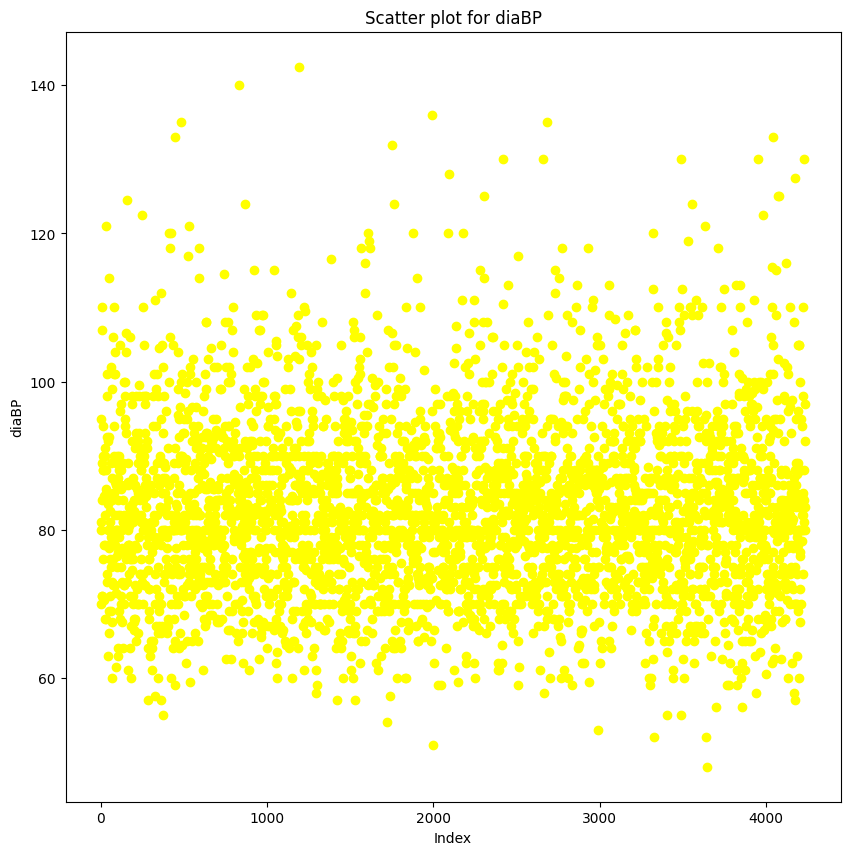

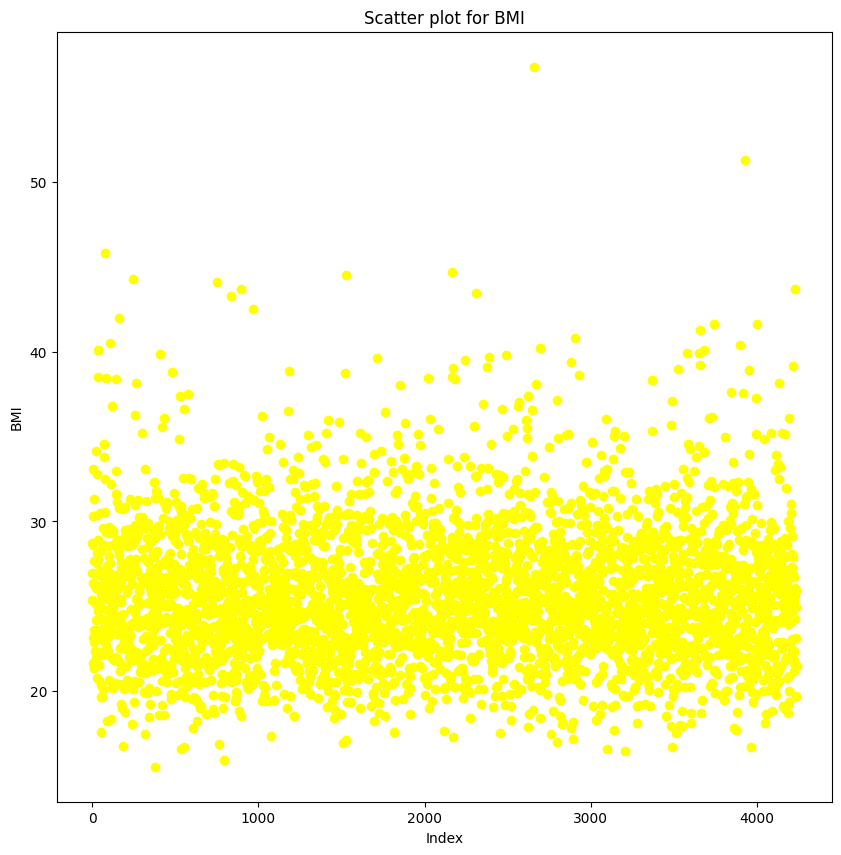

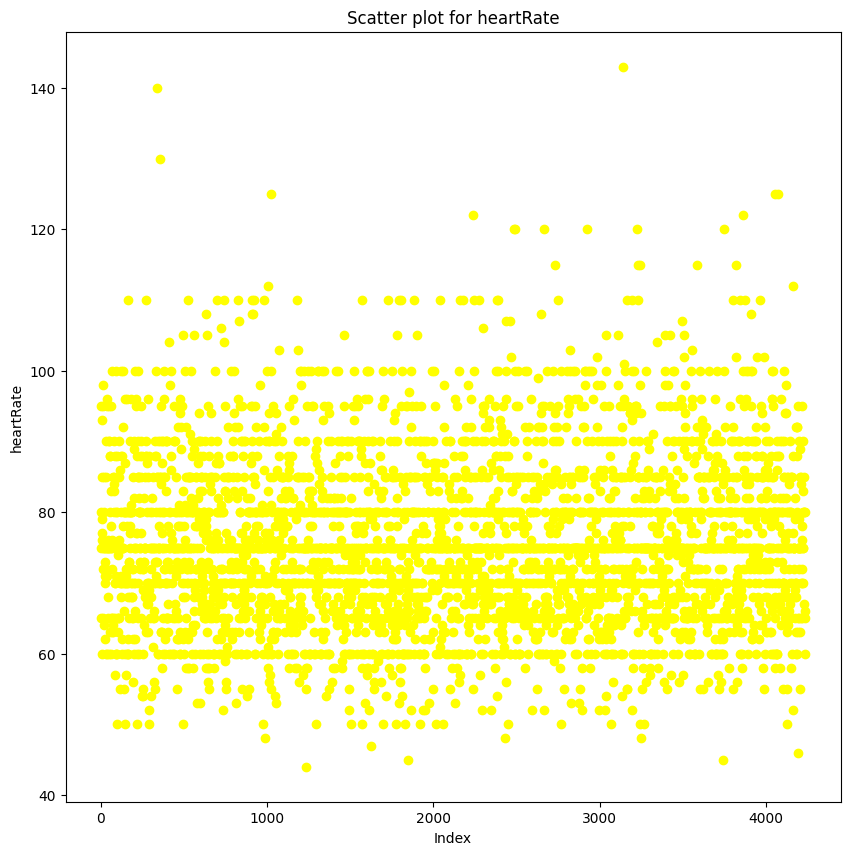

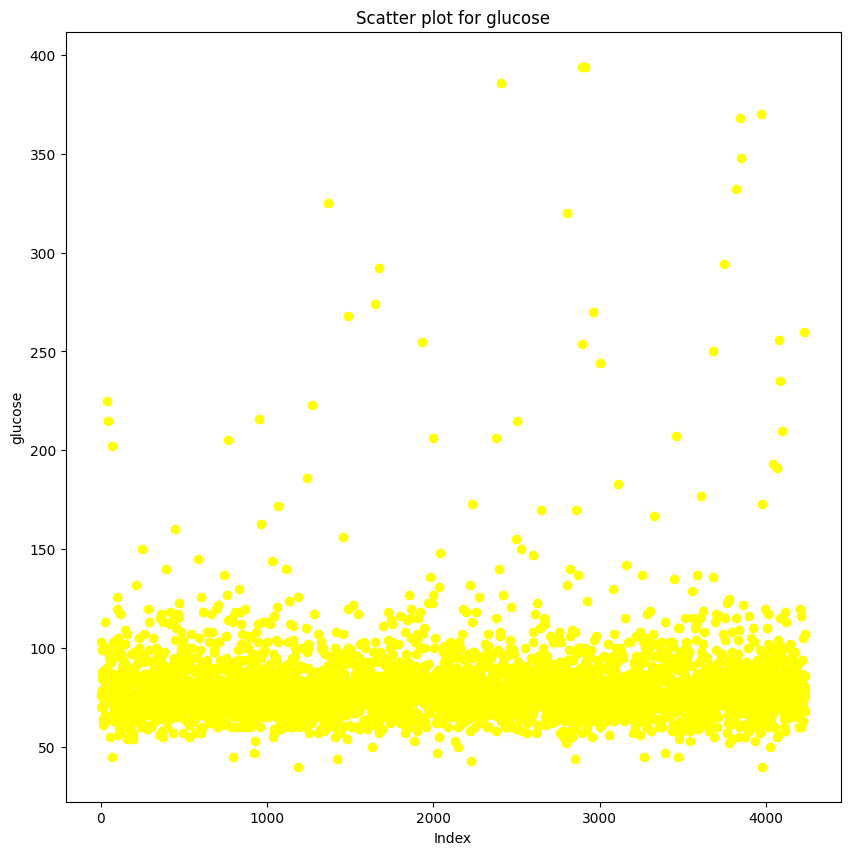

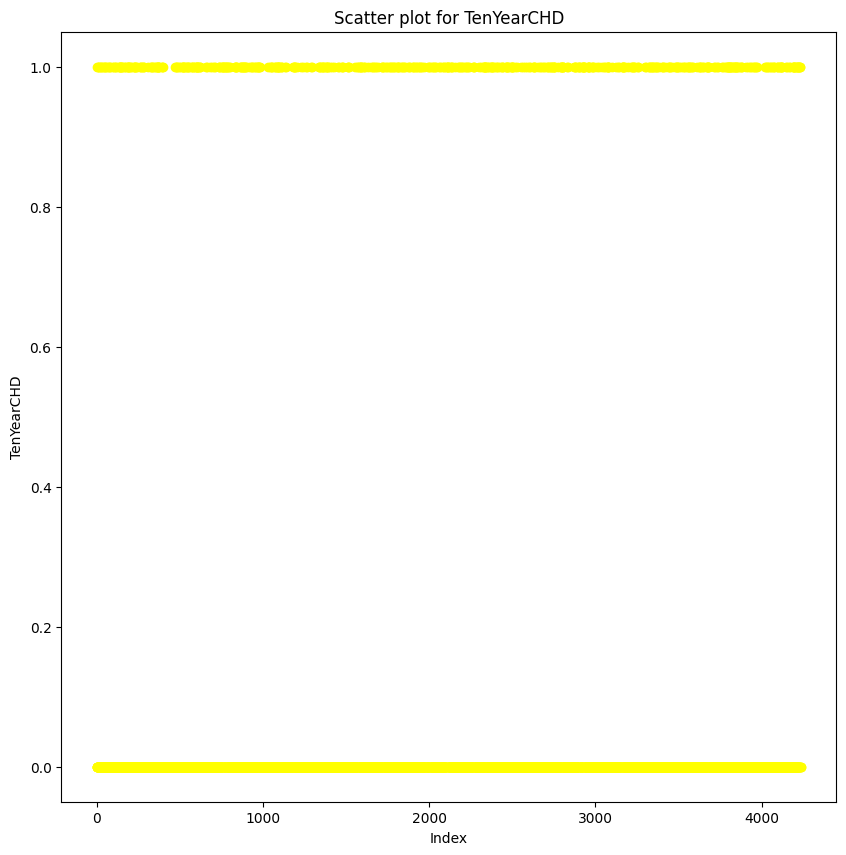

In [75]:
for column in df.columns:
    plt.figure(figsize=(10, 10), facecolor='white')
    plt.scatter(df.index, df[column], color='yellow')
    plt.title(f'Scatter plot for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

# <span style="color:red">ΣΥΝΤΕΛΕΣΤΗΣ ΣΥΣΧΕΤΙΣΗΣ

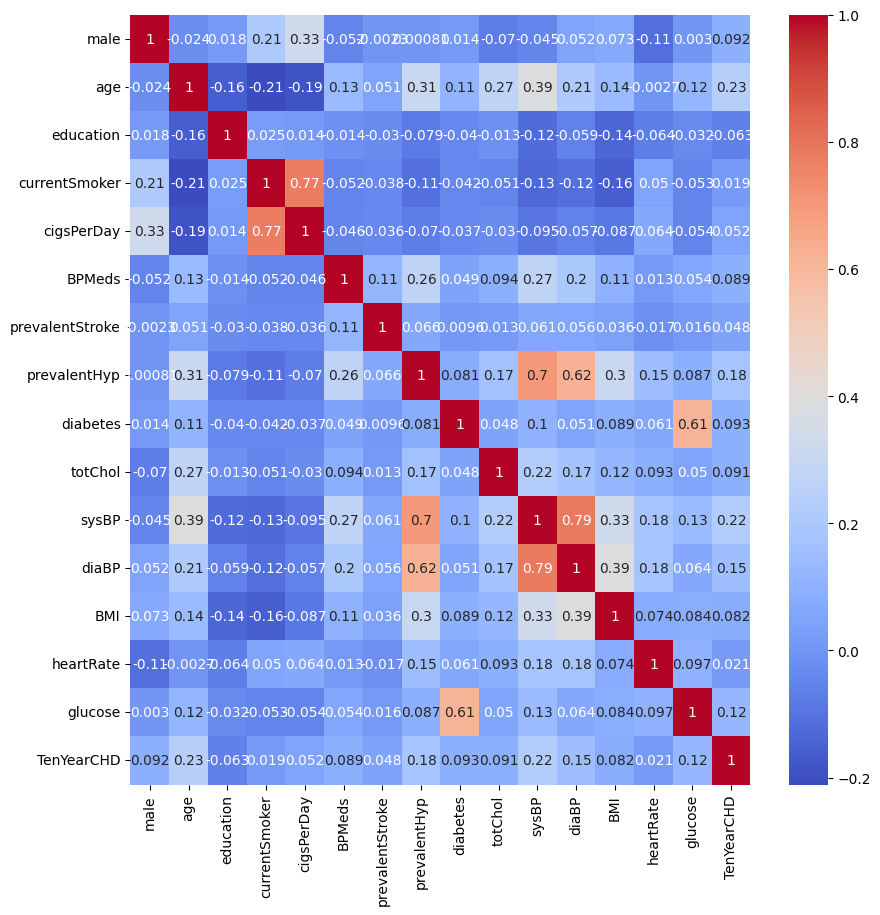

In [76]:
# Πίνακας συσχέτισης που δείχνει πως εξαρτώνται οι μεταβλητές η μια από την άλλη
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# <span style="color:red">ΣΧΟΛΙΑ ΓΙΑ ΤΗΝ ΕΠΕΞΕΡΓΑΣΙΑ ΚΑΙ ΤΗΝ ΑΝΑΛΥΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

<span style="color:yellow">ΠΕΡΙΓΡΑΦΙΚΑ ΣΤΑΤΙΣΤΙΚΑ ΣΤΟΙΧΕΙΑ:

<span style="color:yellow">Το Framingham dataset περιλαμβάνει 4238 παρατηρήσεις με πληροφορίες για διάφορους παράγοντες κινδύνου εμφάνισης στεφανιαίας νόσου (Coronary Heart Disease - CHD). Ο μέσος όρος ηλικίας είναι 49.6 έτη, ενώ το 42.9% των συμμετεχόντων είναι άνδρες. Η εκπαίδευση των συμμετεχόντων κυμαίνεται κυρίως σε δευτεροβάθμιο επίπεδο (μέση τιμή 1.98). Σχεδόν οι μισοί από τους συμμετέχοντες (49.4%) είναι καπνιστές, με τον μέσο όρο τσιγάρων ανά ημέρα να είναι 9.00. Μόνο το 3% λαμβάνουν φάρμακα για την πίεση, ενώ το 31% έχει υπέρταση. Η διαβητική κατάσταση είναι σχετικά χαμηλή με μόλις 2.6% να έχουν διαβήτη. Οι μέσες τιμές για τη συνολική χοληστερίνη, τη συστολική και διαστολική πίεση είναι 236.72 mg/dL, 132.35 mmHg, και 82.89 mmHg, αντίστοιχα. Ο δείκτης μάζας σώματος (BMI) έχει μέση τιμή 25.80 kg/m², υποδηλώνοντας ότι οι περισσότεροι συμμετέχοντες βρίσκονται στο όριο του φυσιολογικού βάρους προς την παχυσαρκία. Επιπλέον, ο μέσος ρυθμός καρδιάς είναι 75.88 bpm, και η μέση τιμή γλυκόζης είναι 81.97 mg/dL. Τέλος, το 15.2% των συμμετεχόντων έχουν κίνδυνο να αναπτύξουν στεφανιαία νόσο μέσα σε 10 χρόνια. Αυτά τα στατιστικά στοιχεία προσφέρουν μια πολύτιμη βάση για την κατανόηση των παραγόντων κινδύνου και την ανάπτυξη προληπτικών μέτρων.

<span style="color:yellow">ΔΙΑΓΡΑΜΜΑΤΑ ΚΑΙ ΠΙΝΑΚΑΣ ΣΥΣΧΕΤΙΣΗΣ:

<span style="color:yellow">Τα ιστογράμματα δείχνουν την κατανομή των αριθμητικών μεταβλητών, αποκαλύπτοντας ότι οι περισσότερες έχουν σχετικά κανονική κατανομή, με κάποιες ανωμαλίες και outliers, όπως στη μεταβλητή cigsPerDay. Οι bar plots για τις κατηγορικές μεταβλητές δείχνουν τη συχνότητα εμφάνισης κάθε κατηγορίας, όπως ότι οι άνδρες είναι λιγότεροι από τις γυναίκες και η πλειοψηφία των συμμετεχόντων δεν έχει ιστορικό εγκεφαλικού ή διαβήτη.

<span style="color:yellow">Τα scatter plots δείχνουν τη διασπορά των τιμών σε σχέση με τον δείκτη των γραμμών, βοηθώντας στην ανίχνευση ανωμαλιών, όπως ακραίες τιμές στη γλυκόζη (glucose). Ο πίνακας συσχέτισης (correlation heatmap) απεικονίζει τις σχέσεις μεταξύ των μεταβλητών με χρωματική κλίμακα, δείχνοντας ισχυρές θετικές συσχετίσεις, όπως μεταξύ της συστολικής και διαστολικής πίεσης (sysBP και diaBP).

# <span style="color:red">ΟΡΙΣΜΟΣ ΜΕΤΑΒΛΗΤΩΝ ΠΟΥ ΘΑ ΧΡΗΣΙΜΟΠΟΙΗΘΟΥΝ ΣΤΑ ΜΟΝΤΕΛΑ

In [77]:
# Ορίζω όλες τις στήλες εκτός από την τελευταία ως χαρακτηριστικά 
X = df.iloc[:, :-1]
X.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [78]:
#Παίρνω το συνολικό αριθμό των γραμμών και των στηλών των ανεξάρτητων μεταβλητών X του dataset
X.shape

(3656, 15)

In [79]:
#Θέτω την τελευταία στήλη του dataset ως την εξαρτημένη μεταβλητή Y και φέρνω τις πρώτες πέντε γραμμές
y = df.iloc[:,-1]
y.head(5)

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: category
Categories (2, int64): [0, 1]

In [80]:
#Δίνει τον τύπο δεδομένων της εξαρτημένης μεταβλητής Υ ως αντικείμενο κλάσης
type(y)

pandas.core.series.Series

# <span style="color:red">ΛΟΓΙΣΤΙΚΗ ΠΑΛΙΝΔΡΟΜΗΣΗ (PINGOUIN)

In [81]:
# Μετατροπή των τιμών των στηλών του dataset σε float
data = df.astype(float)  

In [82]:
#Διαχωρισμός των δεδομένων σε χαρακτηριστικά (Independent Variables) και target variable (Dependent Variable)
X = data.drop("TenYearCHD", axis=1)
y = data["TenYearCHD"]

In [83]:
#Διαχωρισμός του dataset σε training και testing set με αναλογία 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
#Δημιουργία και εκπαίδευση του μοντέλου λογιστικής παλινδρόμησης
y = data["TenYearCHD"]
lr = pg.logistic_regression(X, y, penalty="l2" ).round(3)
lr

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-8.32e+00,7.15e-01,-11.64,0.00e+00,-9.72e+00,-6.92e+00
1,male,5.48e-01,1.09e-01,5.03,0.00e+00,3.35e-01,7.62e-01
2,age,6.30e-02,7.00e-03,9.51,0.00e+00,5.00e-02,7.70e-02
3,education,-4.80e-02,4.90e-02,-0.97,3.33e-01,-1.45e-01,4.90e-02
4,currentSmoker,6.90e-02,1.57e-01,0.44,6.61e-01,-2.38e-01,3.76e-01
5,cigsPerDay,1.80e-02,6.00e-03,2.89,4.00e-03,6.00e-03,3.00e-02
6,BPMeds,1.61e-01,2.34e-01,0.69,4.93e-01,-2.99e-01,6.20e-01
7,prevalentStroke,5.60e-01,4.95e-01,1.13,2.58e-01,-4.11e-01,1.53e+00
8,prevalentHyp,2.32e-01,1.38e-01,1.68,9.30e-02,-3.80e-02,5.03e-01
9,diabetes,3.60e-02,3.16e-01,0.12,9.09e-01,-5.82e-01,6.55e-01


In [85]:
#Δίνει τον πίνακα που περιέχει τις τιμές των coefficients του μοντέλου λογιστικής παλινδρόμησης
pg.logistic_regression(X.to_numpy(), y.to_numpy(),penalty="l2", coef_only=True)

array([-8.32199096e+00,  5.48433908e-01,  6.34895085e-02, -4.77614970e-02,
        6.86603493e-02,  1.80407557e-02,  1.60791771e-01,  5.60150982e-01,
        2.32135485e-01,  3.62548029e-02,  2.31230521e-03,  1.54038535e-02,
       -4.03711422e-03,  6.68997944e-03, -3.31858684e-03,  7.14084291e-03])

# <span style="color:red">ΠΡΟΓΡΑΜΜΑ ΑΠΟΤΕΛΕΣΜΑΤΙΚΟΤΗΤΑΣ ΤΟΥ ΜΟΝΤΕΛΟΥ

In [86]:
##Διαχωρισμός των δεδομένων σε χαρακτηριστικά (Independent Variables) και target variable (Dependent Variable) και ορισμό σταθεράς στο μοντέλο λογιστικής παλινδρόμησης
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X = sm.add_constant(X, prepend=False)

In [87]:
#Δημιουργία και εκπαίδευση του μοντέλου λογιστικής παλινδρόμησης
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print("Parameters:\n",logit_res.params)

Parameters:
 male               5.55e-01
age                6.35e-02
education         -4.75e-02
currentSmoker      7.09e-02
cigsPerDay         1.79e-02
BPMeds             1.62e-01
prevalentStroke    6.94e-01
prevalentHyp       2.35e-01
diabetes           3.95e-02
totChol            2.32e-03
sysBP              1.54e-02
diaBP             -4.13e-03
BMI                6.60e-03
heartRate         -3.25e-03
glucose            7.12e-03
const             -8.32e+00
dtype: float64


In [88]:
#Δημιουργία ενός Identity Matrix με τις διαστάσεις του πίνακα των παραμέτρων του μοντέλου λογιστικής παλινδρόμησης που παίρνει τιμή 1 σε όλες τις διαγώνιες θέσεις εκτός από την πρώτη και διαλέγει όλες τις γραμμές εκτός της πρώτης
A = np.identity(len(logit_res.params))
A = A[1:,:]

In [89]:
#Εκτελεί ένα F-test για τον έλεγχο της σημαντικότητας των παραμέτρων του μοντέλου λογιστικής παλινδρόμησης που έχει πάρει ως όρισμα τον πίνακα A. Παίρνουμε το p-value και το F-value του τεστ.
logit_res.f_test(A)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=56.95946854188017, p=3.868801085444013e-154, df_denom=3.64e+03, df_num=15>

In [90]:
#Δίνει τη μεταβολή της εξαρτημένης μεταβλητής TenYearCHD για κάθε μονάδα αύξησης της κάθε ανεξάρτητης μεταβλητής όταν οι άλλες παραμένουν σταθερές
margeff = logit_res.get_margeff()
print(margeff.summary())

        Logit Marginal Effects       
Dep. Variable:             TenYearCHD
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.0637      0.012      5.114      0.000       0.039       0.088
age                 0.0073      0.001      9.654      0.000       0.006       0.009
education          -0.0055      0.006     -0.962      0.336      -0.017       0.006
currentSmoker       0.0081      0.018      0.452      0.651      -0.027       0.043
cigsPerDay          0.0021      0.001      2.880      0.004       0.001       0.003
BPMeds              0.0186      0.027      0.693      0.488      -0.034       0.071
prevalentStroke     0.0796      0.056      1.418      0.156      -0.030       0.190
prevalentHyp        0.0269      0.016      1.700      0.089      -0.004       0.058
diabetes

In [91]:
#Δίνει το σύνολο των αποτελεσμάτων του μοντέλου λογιστικής παλινδρόμησης που περιέχει τις τιμές των παραμέτρων, τα p-values, τα t-values και τα confidence intervals
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3640
Method:                           MLE   Df Model:                           15
Date:                Thu, 14 Aug 2025   Pseudo R-squ.:                  0.1174
Time:                        13:15:44   Log-Likelihood:                -1377.1
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 8.027e-69
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.5551      0.109      5.090      0.000       0.341       0.769
age                 0.0635      0.007      9.499      0.000       0.050       0.077
education          -0.0475      

In [92]:
#Υπολογίζει τις πιθανότητες για την εξαρτημένη μεταβλητή TenYearCHD
pred_probs = logit_res.predict(X)

In [93]:
#Δίνει τις πιθανότητες για την εξαρτημένη μεταβλητή TenYearCHD
print(logit_res.predict(X)) 

0       0.04
1       0.05
2       0.15
3       0.35
4       0.09
        ... 
4231    0.22
4232    0.46
4233    0.34
4234    0.21
4237    0.11
Length: 3656, dtype: float64


In [94]:
#Δημιουργεί μια νέα μεταβλητή με βάση τις πιθανότητες που υπολόγισε το μοντέλο λογιστικής παλινδρόμησης και ελέγχει αν η πιθανότητα είναι μεγαλύτερη από 0.5
pred_labels = (pred_probs > 0.5).astype(int)

In [95]:
# Υπολογίζει την ακρίβεια του μοντέλου λογιστικής παλινδρόμησης 
accuracy = np.mean(pred_labels == y)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.8564004376367614


# <span style="color:red">ΔΗΜΙΟΥΡΓΙΑ PIPELINE ΓΙΑ ΤΟΝ ΥΠΟΛΟΓΙΣΜΟ ΤΗΣ ΑΚΡΙΒΕΙΑΣ ΤΟΥ ΜΟΝΤΕΛΟΥ

In [96]:
# Δημιουργία του pipeline
pipeline = Pipeline([  
('preprocessing', StandardScaler()), # Προεπεξεργασία δεδομένων με StandardScaler   
('feature_selection', SelectKBest(k=10)),  #Δοκιμάζουμε με διαφορετικό αριθμό χαρακτηριστικών για να βρούμε την καλύτερη ακρίβεια. Εδώ έχουμε βάλει 10 χαρακτηριστικά
 ('model', LogisticRegression()) ]) # Εκτίμηση με λογιστική παλινδρόμηση 

# Εκπαίδευση του μοντέλου
pipeline.fit(X_train, y_train)

# Πρόβλεψη σε νέα δεδομένα
y_pred = pipeline.predict(X_test)

In [97]:
#Υπολογισμός της ακρίβειας του μοντέλου με τη χρήση της μεθόδου score
accuracy = pipeline.score(X_test, y_test)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.8346994535519126
